# 통계 분석
목적 통행량 : 최초 승차에서 최종 하차까지 대중교통 이용을 1회로 파악(환승 횟수는 무시하며 여기서 숫자 1의 의미는 사람 한 명을 의미함)

In [ ]:
!pip install koreanize-matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 23.3 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib

## 1월

### 경기도 용인시 목적통행량 분석(1월)

In [ ]:
import pandas as pd
df_yongin = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_용인1.xlsx')

df_yongin = df_yongin.drop([1], axis=0)
df_yongin = df_yongin.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_yongin = df_yongin.reset_index(drop=True)

df_yongin = df_yongin.loc[5]
df_yongin = df_yongin.tolist()
df_yongin_list = df_yongin[1:]
df_yongin_list #04시~익일 2시, (발생량,도착량) 순서

[1570,
 11,
 73532,
 16586,
 278240,
 79337,
 581267,
 168184,
 588801,
 346908,
 377407,
 237105,
 273773,
 179870,
 265894,
 183500,
 282256,
 205648,
 276283,
 231567,
 265427,
 237136,
 287736,
 264676,
 311185,
 310353,
 363773,
 389708,
 391476,
 556238,
 231189,
 550064,
 195594,
 380671,
 165859,
 317077,
 133041,
 304377,
 63833,
 219513,
 13527,
 80768,
 769,
 4942,
 59,
 270]

In [ ]:
df_yongin_generation = []
count = 1
for i in df_yongin_list:
    if count%2 == 1:
        df_yongin_generation.append(i)
    count += 1

df_yongin_generation #발생량만 뽑은 리스트

df_yongin_arrival = []
count2 = 1
for i in df_yongin_list:
    if count2%2 == 0:
        df_yongin_arrival.append(i)
    count2 += 1

df_yongin_arrival #도착량만 뽑은 데이터

[11,
 16586,
 79337,
 168184,
 346908,
 237105,
 179870,
 183500,
 205648,
 231567,
 237136,
 264676,
 310353,
 389708,
 556238,
 550064,
 380671,
 317077,
 304377,
 219513,
 80768,
 4942,
 270]

In [ ]:
!pip install matplotlib

**발생량 vs 도착량**

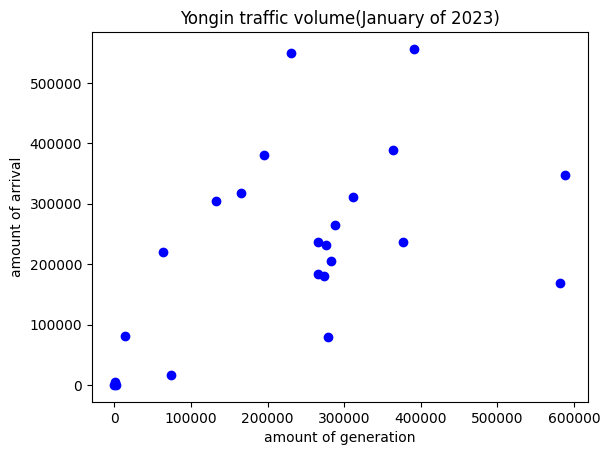

In [ ]:
import matplotlib.pyplot as plt

x_values_yongin = df_yongin_generation
y_values_yongin = df_yongin_arrival

plt.scatter(x_values_yongin, y_values_yongin, color='blue', marker='o', label='데이터 포인트')

plt.title('Yongin traffic volume(January of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (용인시)**

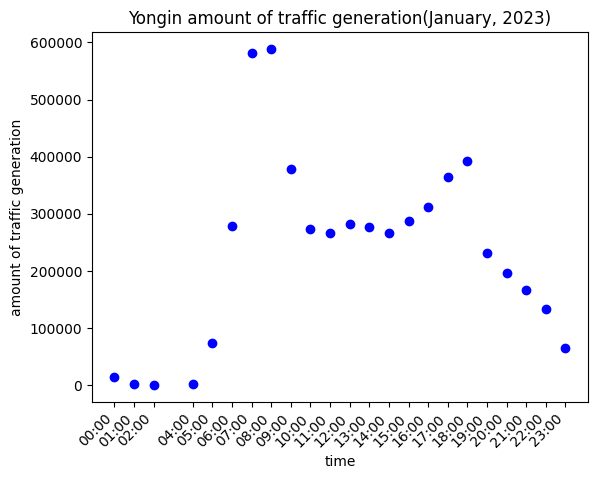

In [ ]:
from datetime import datetime

time_data_yongin_generation1 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00']
numeric_data_yongin_generation = df_yongin_generation

time_data_yongin_generation1 = [datetime.strptime(time, '%H:%M') for time in time_data_yongin_generation1]

plt.scatter(time_data_yongin_generation1, numeric_data_yongin_generation, color='blue', marker='o', label='데이터 포인트')

plt.title('Yongin amount of traffic generation(January, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_yongin_generation1, [time.strftime('%H:%M') for time in time_data_yongin_generation1], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화**

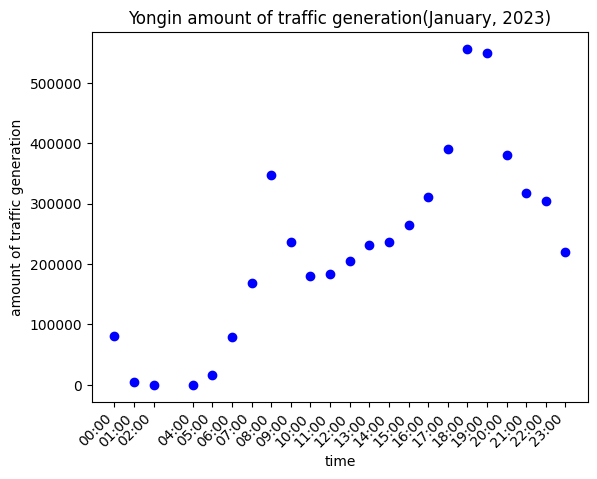

In [ ]:
time_data_yongin_arrival1 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00']
numeric_data_yongin_arrival = df_yongin_arrival

time_data_yongin_arrival1 = [datetime.strptime(time, '%H:%M') for time in time_data_yongin_arrival1]

plt.scatter(time_data_yongin_arrival1, numeric_data_yongin_arrival, color='blue', marker='o', label='데이터 포인트')

plt.title('Yongin amount of traffic generation(January, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_yongin_arrival1, [time.strftime('%H:%M') for time in time_data_yongin_arrival1], rotation=45, ha='right')

plt.show()

**용인시 교통 발생량 boxplot**

In [ ]:
import plotly.express as px

fig_yongin_generation1 = px.box(y=df_yongin_generation, points='all')
fig_yongin_generation1.update_yaxes(title_text='amount of traffic generation(January)')

fig_yongin_arrival1 = px.box(y=df_yongin_arrival, points='all')
fig_yongin_arrival1.update_yaxes(title_text='amount of traffic arrival(January)')

fig_yongin_generation1.show()
fig_yongin_arrival1.show()

**용인시 교통 발생량 histogram**

In [ ]:
fig_yongin_generation1_hist = px.histogram(x=time_data_yongin_generation1, y=df_yongin_generation, nbins=25)
fig_yongin_generation1_hist.update_yaxes(title_text='amount of traffic generation(January)')

fig_yongin_arrival1_hist = px.histogram(x=time_data_yongin_arrival1, y=df_yongin_arrival, nbins=25)
fig_yongin_arrival1_hist.update_yaxes(title_text='amount of traffic arrival(January)')

fig_yongin_generation1_hist.show()
fig_yongin_arrival1_hist.show()

### 경기도 고양시 목적통행량 분석(1월)

In [ ]:
df_goyang = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_고양1.xlsx')

df_goyang = df_goyang.drop([1], axis=0)
df_goyang = df_goyang.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_goyang = df_goyang.reset_index(drop=True)

df_goyang = df_goyang.loc[5]
df_goyang = df_goyang.tolist()
df_goyang_list = df_goyang[1:]
df_goyang_list #04시~익일 2시, (발생량,도착량) 순서

[14108,
 2365,
 129608,
 33743,
 382146,
 113162,
 804137,
 216302,
 754111,
 495670,
 458465,
 362619,
 353759,
 278643,
 356630,
 273161,
 382418,
 307851,
 383681,
 348009,
 369957,
 345159,
 398794,
 378971,
 435736,
 425878,
 515197,
 540483,
 549198,
 774567,
 310246,
 736665,
 279366,
 465880,
 253483,
 419613,
 210089,
 385198,
 96973,
 263051,
 32559,
 104210,
 9001,
 22995,
 2408,
 5001,
 434,
 509]

In [ ]:
df_goyang_generation = []
count3 = 1
for i in df_goyang_list:
    if count3%2 == 1:
        df_goyang_generation.append(i)
    count3 += 1

df_goyang_generation #발생량만 뽑은 리스트

df_goyang_arrival = []
count4 = 1
for i in df_goyang_list:
    if count4%2 == 0:
        df_goyang_arrival.append(i)
    count4 += 1

df_goyang_arrival #도착량만 뽑은 데이터

[2365,
 33743,
 113162,
 216302,
 495670,
 362619,
 278643,
 273161,
 307851,
 348009,
 345159,
 378971,
 425878,
 540483,
 774567,
 736665,
 465880,
 419613,
 385198,
 263051,
 104210,
 22995,
 5001,
 509]

**발생량 vs 도착량**

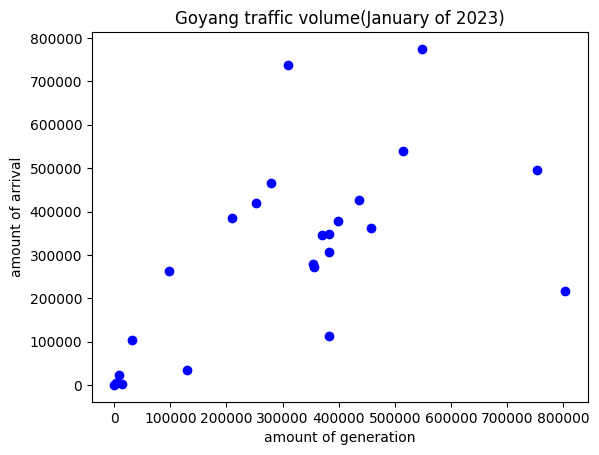

In [ ]:
x_values_goyang = df_goyang_generation
y_values_goyang = df_goyang_arrival

plt.scatter(x_values_goyang, y_values_goyang, color='blue', marker='o', label='데이터 포인트')

plt.title('Goyang traffic volume(January of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화**

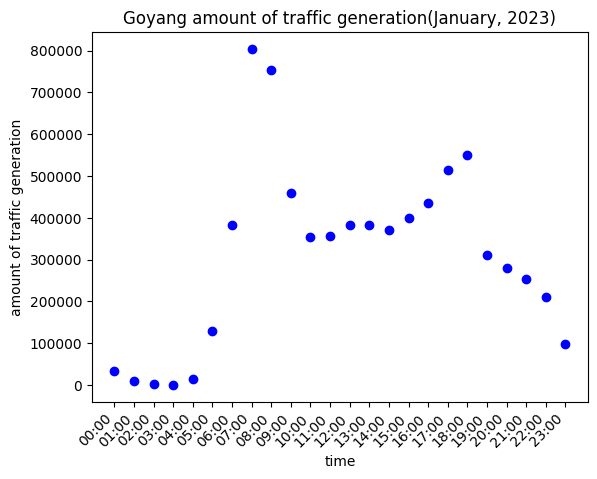

In [ ]:
time_data_goyang_generation1 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_goyang_generation = df_goyang_generation

time_data_goyang_generation1 = [datetime.strptime(time, '%H:%M') for time in time_data_goyang_generation1]

plt.scatter(time_data_goyang_generation1, numeric_data_goyang_generation, color='blue', marker='o', label='데이터 포인트')

plt.title('Goyang amount of traffic generation(January, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_goyang_generation1, [time.strftime('%H:%M') for time in time_data_goyang_generation1], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화**

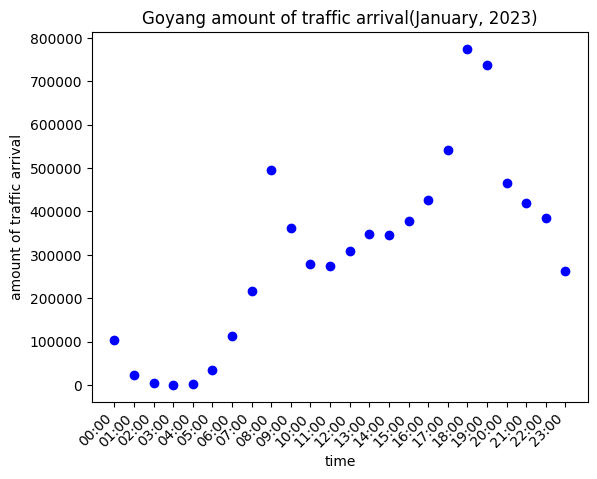

In [ ]:
time_data_goyang_arrival1 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_goyang_arrival = df_goyang_arrival

time_data_goyang_arrival1 = [datetime.strptime(time, '%H:%M') for time in time_data_goyang_arrival1]

plt.scatter(time_data_goyang_arrival1, numeric_data_goyang_arrival, color='blue', marker='o', label='데이터 포인트')

plt.title('Goyang amount of traffic arrival(January, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_goyang_arrival1, [time.strftime('%H:%M') for time in time_data_goyang_arrival1], rotation=45, ha='right')

plt.show()

### 경기도 남양주시 목적통행량 분석(1월)

In [ ]:
df_namyangju = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_남양주1.xlsx')

df_namyangju = df_namyangju.drop([1], axis=0)
df_namyangju = df_namyangju.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_namyangju = df_namyangju.reset_index(drop=True)

df_namyangju = df_namyangju.loc[5]
df_namyangju = df_namyangju.tolist()
df_namyangju_list = df_namyangju[1:]
df_namyangju_list #04시~익일 2시, (발생량,도착량) 순서

[10702,
 1137,
 70742,
 11039,
 203446,
 45010,
 414628,
 103769,
 347772,
 217831,
 222182,
 144153,
 176538,
 112419,
 171835,
 111116,
 183170,
 127990,
 178749,
 142475,
 166915,
 145637,
 175406,
 166111,
 191055,
 191329,
 215215,
 241007,
 232015,
 335699,
 124947,
 356327,
 103184,
 236970,
 92309,
 199630,
 69956,
 184317,
 30189,
 129787,
 9922,
 55699,
 2576,
 10412,
 338,
 1293]

In [ ]:
df_namyangju_generation = []
count5 = 1
for i in df_namyangju_list:
    if count5%2 == 1:
        df_namyangju_generation.append(i)
    count5 += 1

df_namyangju_generation #발생량만 뽑은 리스트

df_namyangju_arrival = []
count6 = 1
for i in df_namyangju_list:
    if count6%2 == 0:
        df_namyangju_arrival.append(i)
    count6 += 1

df_namyangju_arrival #도착량만 뽑은 데이터

[1137,
 11039,
 45010,
 103769,
 217831,
 144153,
 112419,
 111116,
 127990,
 142475,
 145637,
 166111,
 191329,
 241007,
 335699,
 356327,
 236970,
 199630,
 184317,
 129787,
 55699,
 10412,
 1293]

**발생량 vs 도착량 (남양주시)**

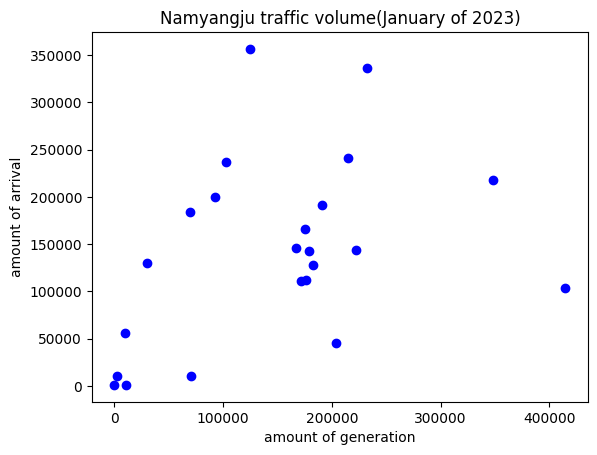

In [ ]:
x_values_namyangju = df_namyangju_generation
y_values_namyangju = df_namyangju_arrival

plt.scatter(x_values_namyangju, y_values_namyangju, color='blue', marker='o', label='데이터 포인트')

plt.title('Namyangju traffic volume(January of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (남양주시)**

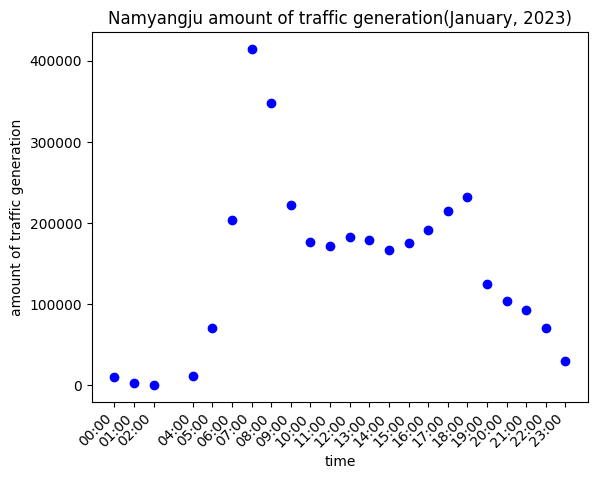

In [ ]:
time_data_namyangju_generation1 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00']
numeric_data_namyangju_generation = df_namyangju_generation

time_data_namyangju_generation1 = [datetime.strptime(time, '%H:%M') for time in time_data_namyangju_generation1]

plt.scatter(time_data_namyangju_generation1, numeric_data_namyangju_generation, color='blue', marker='o', label='데이터 포인트')

plt.title('Namyangju amount of traffic generation(January, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_namyangju_generation1, [time.strftime('%H:%M') for time in time_data_namyangju_generation1], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (남양주시)**

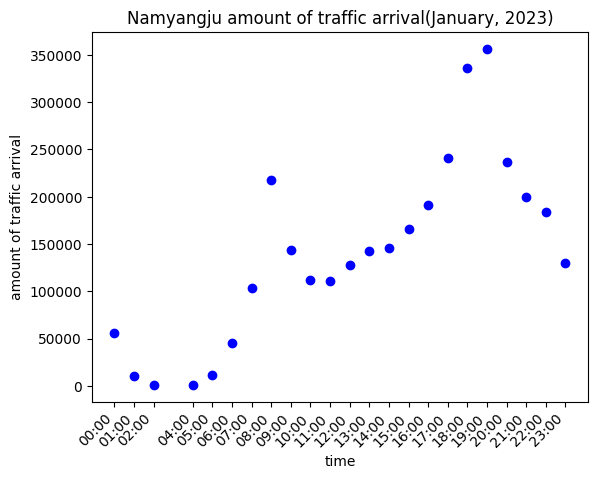

In [ ]:
time_data_namyangju_arrival1 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00']
numeric_data_namyangju_arrival = df_namyangju_arrival

time_data_namyangju_arrival1 = [datetime.strptime(time, '%H:%M') for time in time_data_namyangju_arrival1]

plt.scatter(time_data_namyangju_arrival1, numeric_data_namyangju_arrival, color='blue', marker='o', label='데이터 포인트')

plt.title('Namyangju amount of traffic arrival(January, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_namyangju_arrival1, [time.strftime('%H:%M') for time in time_data_namyangju_arrival1], rotation=45, ha='right')

plt.show()

### 경기도 수원시 목적통행량 분석 (1월)

In [ ]:
df_suwon = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_수원1.xlsx')

df_suwon = df_suwon.drop([1], axis=0)
df_suwon = df_suwon.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_suwon = df_suwon.reset_index(drop=True)

df_suwon = df_suwon.loc[5]
df_suwon = df_suwon.tolist()
df_suwon_list = df_suwon[1:]
df_suwon_list #04시~익일 2시, (발생량,도착량) 순서

[18002,
 2630,
 166886,
 58293,
 425732,
 180918,
 817005,
 321395,
 773565,
 661236,
 502586,
 487307,
 400088,
 379283,
 422187,
 389026,
 458729,
 434683,
 467458,
 470225,
 467044,
 460612,
 522842,
 497277,
 593838,
 565535,
 673110,
 664778,
 739803,
 903091,
 458174,
 808482,
 426331,
 541218,
 381989,
 463227,
 312278,
 410339,
 135916,
 263489,
 22822,
 88979,
 2217,
 10158,
 397,
 980,
 230,
 226]

In [ ]:
df_suwon_generation = []
count13 = 1
for i in df_suwon_list:
    if count13%2 == 1:
        df_suwon_generation.append(i)
    count13 += 1

df_suwon_generation #발생량만 뽑은 리스트

df_suwon_arrival = []
count14 = 1
for i in df_suwon_list:
    if count14%2 == 0:
        df_suwon_arrival.append(i)
    count14 += 1

df_suwon_arrival #도착량만 뽑은 데이터

[2630,
 58293,
 180918,
 321395,
 661236,
 487307,
 379283,
 389026,
 434683,
 470225,
 460612,
 497277,
 565535,
 664778,
 903091,
 808482,
 541218,
 463227,
 410339,
 263489,
 88979,
 10158,
 980,
 226]

**발생량 vs 도착량 (수원시)**

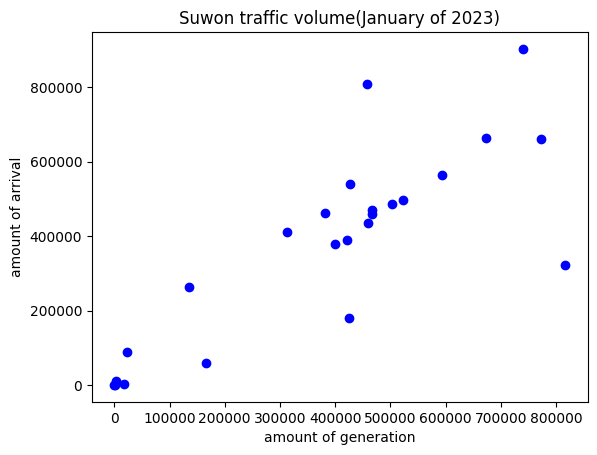

In [ ]:
x_values_suwon = df_suwon_generation
y_values_suwon = df_suwon_arrival

plt.scatter(x_values_suwon, y_values_suwon, color='blue', marker='o', label='데이터 포인트')

plt.title('Suwon traffic volume(January of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (수원시)**

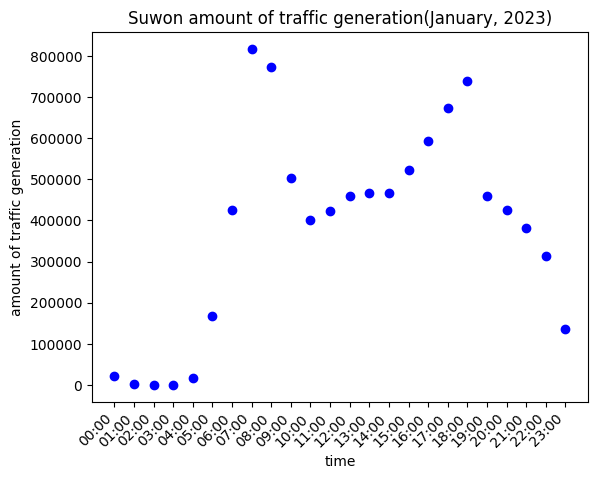

In [ ]:
time_data_suwon_generation1 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_suwon_generation = df_suwon_generation

time_data_suwon_generation1 = [datetime.strptime(time, '%H:%M') for time in time_data_suwon_generation1]

plt.scatter(time_data_suwon_generation1, numeric_data_suwon_generation, color='blue', marker='o', label='데이터 포인트')

plt.title('Suwon amount of traffic generation(January, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_suwon_generation1, [time.strftime('%H:%M') for time in time_data_suwon_generation1], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (수원시)**

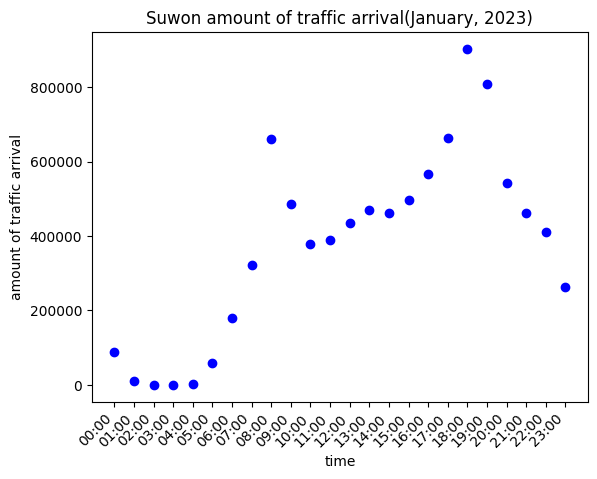

In [ ]:
time_data_suwon_arrival1 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_suwon_arrival = df_suwon_arrival

time_data_suwon_arrival1 = [datetime.strptime(time, '%H:%M') for time in time_data_suwon_arrival1]

plt.scatter(time_data_suwon_arrival1, numeric_data_suwon_arrival, color='blue', marker='o', label='데이터 포인트')

plt.title('Suwon amount of traffic arrival(January, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_suwon_arrival1, [time.strftime('%H:%M') for time in time_data_suwon_arrival1], rotation=45, ha='right')

plt.show()

## 4월

### 경기도 용인시 목적통행량 분석(4월)

In [ ]:
df_yongin4 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_용인4.xlsx')

df_yongin4 = df_yongin4.drop([1], axis=0)
df_yongin4 = df_yongin4.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_yongin4 = df_yongin4.reset_index(drop=True)

df_yongin4 = df_yongin4.loc[5]
df_yongin4 = df_yongin4.tolist()
df_yongin4_list = df_yongin4[1:]
df_yongin4_list #04시~익일 2시, (발생량,도착량) 순서

[20116,
 2764,
 182662,
 62497,
 479752,
 201303,
 934256,
 374907,
 875945,
 772765,
 583648,
 576721,
 459650,
 445489,
 475087,
 438754,
 517689,
 480586,
 514572,
 528774,
 498295,
 490349,
 563897,
 525844,
 672921,
 616709,
 737148,
 743883,
 784209,
 978885,
 514531,
 877420,
 477969,
 592613,
 420371,
 508529,
 335565,
 453974,
 141189,
 288430,
 23685,
 96717,
 2482,
 11602,
 451,
 1263,
 230,
 237]

In [ ]:
df_yongin4_generation = []
count17 = 1
for i in df_yongin4_list:
    if count17%2 == 1:
        df_yongin4_generation.append(i)
    count17 += 1

df_yongin4_generation #발생량만 뽑은 리스트

df_yongin4_arrival = []
count18 = 1
for i in df_yongin4_list:
    if count18%2 == 0:
        df_yongin4_arrival.append(i)
    count18 += 1

df_yongin4_arrival #도착량만 뽑은 데이터

[2764,
 62497,
 201303,
 374907,
 772765,
 576721,
 445489,
 438754,
 480586,
 528774,
 490349,
 525844,
 616709,
 743883,
 978885,
 877420,
 592613,
 508529,
 453974,
 288430,
 96717,
 11602,
 1263,
 237]

**발생량 vs 도착량 (용인시)**

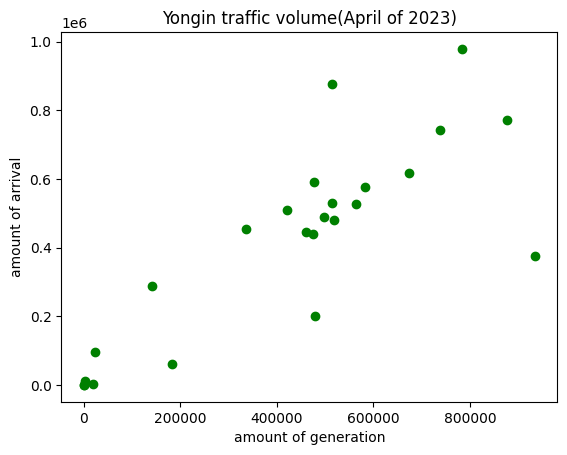

In [ ]:
x_values_yongin4 = df_yongin4_generation
y_values_yongin4 = df_yongin4_arrival

plt.scatter(x_values_yongin4, y_values_yongin4, color='green', marker='o', label='데이터 포인트')

plt.title('Yongin traffic volume(April of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (용인시)**

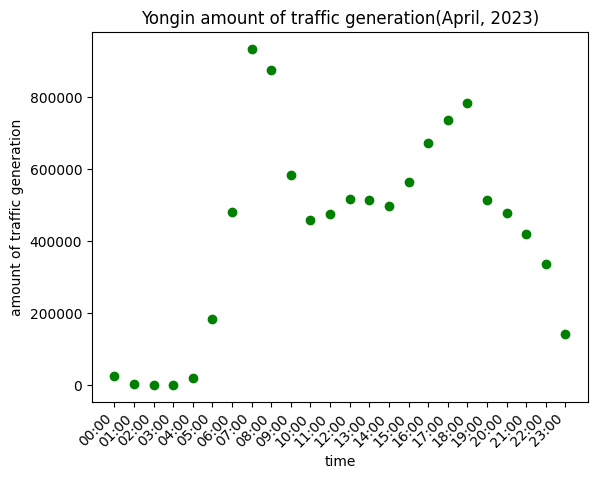

In [ ]:
time_data_yongin_generation4 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', "3:00"]
numeric_data_yongin4_generation = df_yongin4_generation

time_data_yongin_generation4 = [datetime.strptime(time, '%H:%M') for time in time_data_yongin_generation4]

plt.scatter(time_data_yongin_generation4, numeric_data_yongin4_generation, color='green', marker='o', label='데이터 포인트')

plt.title('Yongin amount of traffic generation(April, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_yongin_generation4, [time.strftime('%H:%M') for time in time_data_yongin_generation4], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (용인시)**

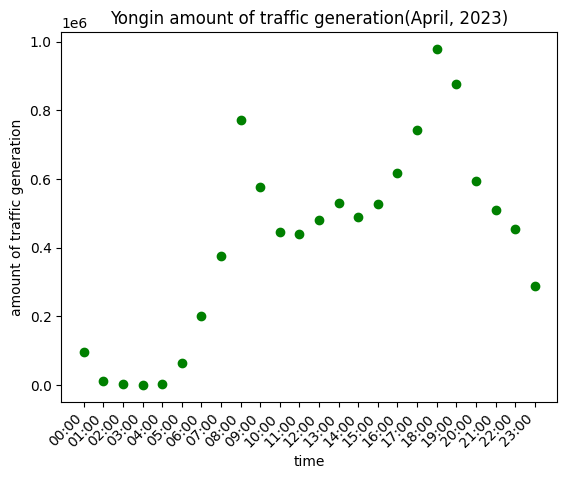

In [ ]:
time_data_yongin_arrival4 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', "3:00"]
numeric_data_yongin4_arrival = df_yongin4_arrival

time_data_yongin_arrival4 = [datetime.strptime(time, '%H:%M') for time in time_data_yongin_arrival4]

plt.scatter(time_data_yongin_arrival4, numeric_data_yongin4_arrival, color='green', marker='o', label='데이터 포인트')

plt.title('Yongin amount of traffic generation(April, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_yongin_arrival4, [time.strftime('%H:%M') for time in time_data_yongin_arrival4], rotation=45, ha='right')

plt.show()

### 경기도 고양시 목적통행량 분석(4월)

In [ ]:
df_goyang4 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_고양4.xlsx')

df_goyang4 = df_goyang4.drop([1], axis=0)
df_goyang4 = df_goyang4.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_goyang4 = df_goyang4.reset_index(drop=True)

df_goyang4 = df_goyang4.loc[5]
df_goyang4 = df_goyang4.tolist()
df_goyang4_list = df_goyang4[1:]
df_goyang4_list #04시~익일 2시, (발생량,도착량) 순서

[16703,
 2691,
 145782,
 35863,
 436054,
 125965,
 896935,
 250010,
 838438,
 552406,
 525998,
 411034,
 404420,
 319282,
 391210,
 297188,
 406920,
 326110,
 405465,
 370564,
 385365,
 365842,
 417790,
 398242,
 474761,
 458990,
 538611,
 591985,
 563671,
 823136,
 334300,
 779537,
 295128,
 501932,
 262469,
 449980,
 214078,
 416459,
 97343,
 282246,
 30951,
 111810,
 8699,
 24410,
 2489,
 5819,
 417,
 580]

In [ ]:
df_goyang4_generation = []
count19 = 1
for i in df_goyang4_list:
    if count19%2 == 1:
        df_goyang4_generation.append(i)
    count19 += 1

df_goyang4_generation #발생량만 뽑은 리스트

df_goyang4_arrival = []
count20 = 1
for i in df_goyang4_list:
    if count20%2 == 0:
        df_goyang4_arrival.append(i)
    count20 += 1

df_goyang4_arrival #도착량만 뽑은 데이터

[2691,
 35863,
 125965,
 250010,
 552406,
 411034,
 319282,
 297188,
 326110,
 370564,
 365842,
 398242,
 458990,
 591985,
 823136,
 779537,
 501932,
 449980,
 416459,
 282246,
 111810,
 24410,
 5819,
 580]

**발생량 vs 도착량**

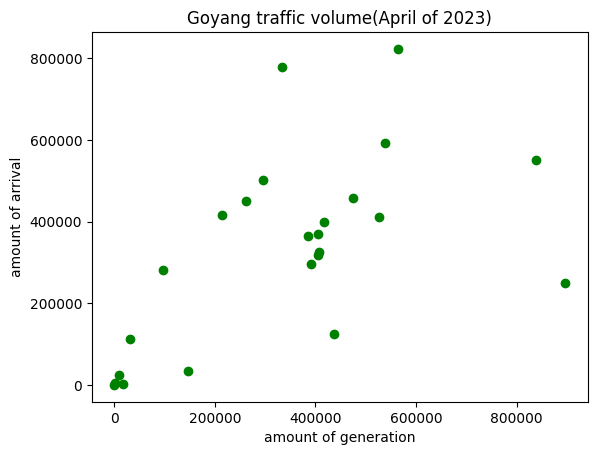

In [ ]:
x_values_goyang4 = df_goyang4_generation
y_values_goyang4 = df_goyang4_arrival

plt.scatter(x_values_goyang4, y_values_goyang4, color='green', marker='o', label='데이터 포인트')

plt.title('Goyang traffic volume(April of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (고양시)**

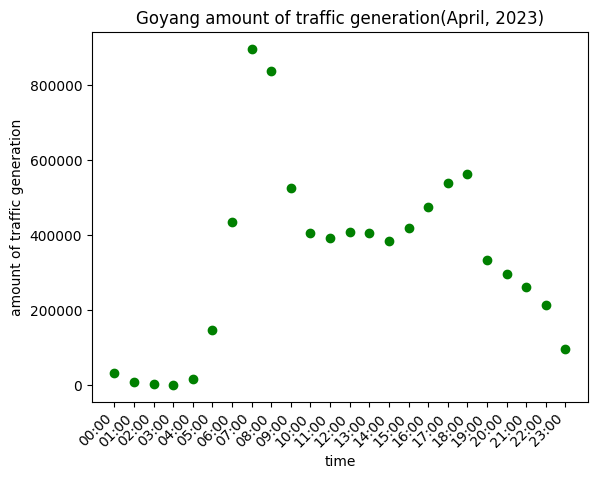

In [ ]:
time_data_goyang_generation4 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_goyang4_generation = df_goyang4_generation

time_data_goyang_generation4 = [datetime.strptime(time, '%H:%M') for time in time_data_goyang_generation4]

plt.scatter(time_data_goyang_generation4, numeric_data_goyang4_generation, color='green', marker='o', label='데이터 포인트')

plt.title('Goyang amount of traffic generation(April, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_goyang_generation4, [time.strftime('%H:%M') for time in time_data_goyang_generation4], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (고양시)**

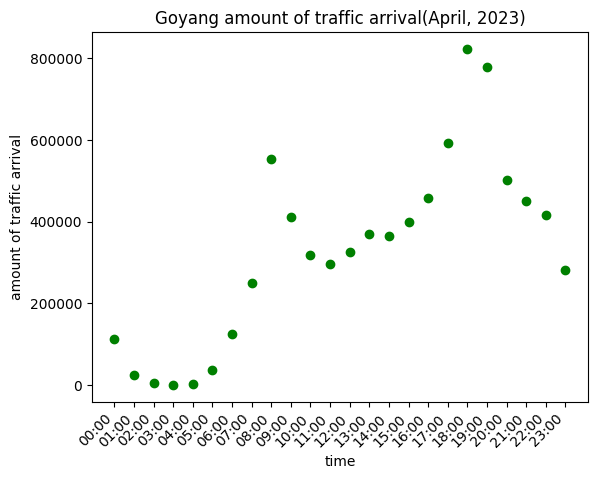

In [ ]:
time_data_goyang_arrival4 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_goyang4_arrival = df_goyang4_arrival

time_data_goyang_arrival4 = [datetime.strptime(time, '%H:%M') for time in time_data_goyang_arrival4]

plt.scatter(time_data_goyang_arrival4, numeric_data_goyang4_arrival, color='green', marker='o', label='데이터 포인트')

plt.title('Goyang amount of traffic arrival(April, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_goyang_arrival4, [time.strftime('%H:%M') for time in time_data_goyang_arrival4], rotation=45, ha='right')

plt.show()

### 경기도 남양주시 목적통행량 분석(4월)

In [ ]:
df_namyangju4 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_남양주4.xlsx')

df_namyangju4 = df_namyangju4.drop([1], axis=0)
df_namyangju4 = df_namyangju4.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_namyangju4 = df_namyangju4.reset_index(drop=True)

df_namyangju4 = df_namyangju4.loc[5]
df_namyangju4 = df_namyangju4.tolist()
df_namyangju4_list = df_namyangju4[1:]
df_namyangju4_list #04시~익일 2시, (발생량,도착량) 순서

[12572,
 1165,
 81842,
 12596,
 235436,
 52826,
 470996,
 122069,
 395524,
 251803,
 256912,
 174829,
 197210,
 128364,
 187609,
 122381,
 195355,
 137859,
 186405,
 155435,
 170283,
 155822,
 184334,
 176578,
 213324,
 209610,
 235605,
 272708,
 242943,
 365172,
 140210,
 383546,
 114463,
 254941,
 100680,
 217559,
 73833,
 201663,
 30688,
 141546,
 9911,
 57664,
 2457,
 10384,
 390,
 1428,
 0,
 11]

In [ ]:
df_namyangju4_generation = []
count21 = 1
for i in df_namyangju4_list:
    if count21%2 == 1:
        df_namyangju4_generation.append(i)
    count21 += 1

df_namyangju4_generation #발생량만 뽑은 리스트

df_namyangju4_arrival = []
count22 = 1
for i in df_namyangju4_list:
    if count22%2 == 0:
        df_namyangju4_arrival.append(i)
    count22 += 1

df_namyangju4_arrival #도착량만 뽑은 데이터

[1165,
 12596,
 52826,
 122069,
 251803,
 174829,
 128364,
 122381,
 137859,
 155435,
 155822,
 176578,
 209610,
 272708,
 365172,
 383546,
 254941,
 217559,
 201663,
 141546,
 57664,
 10384,
 1428,
 11]

**발생량 vs 도착량 (남양주시)**

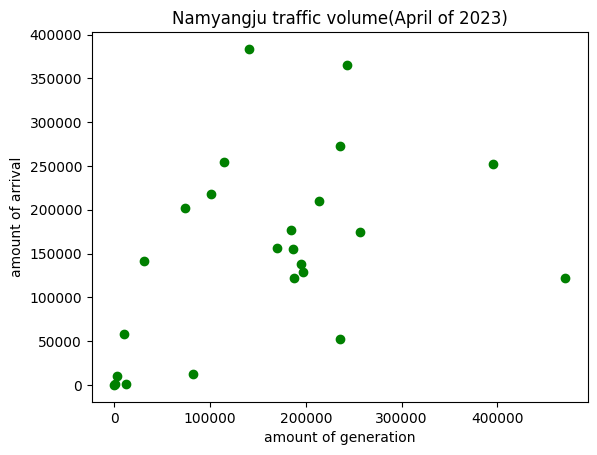

In [ ]:
x_values_namyangju4 = df_namyangju4_generation
y_values_namyangju4 = df_namyangju4_arrival

plt.scatter(x_values_namyangju4, y_values_namyangju4, color='green', marker='o', label='데이터 포인트')

plt.title('Namyangju traffic volume(April of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (남양주시)**

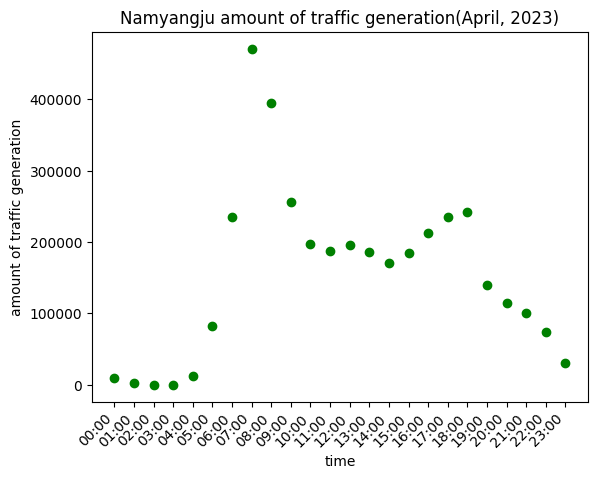

In [ ]:
time_data_namyangju_generation4 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_namyangju4_generation = df_namyangju4_generation

time_data_namyangju_generation4 = [datetime.strptime(time, '%H:%M') for time in time_data_namyangju_generation4]

plt.scatter(time_data_namyangju_generation4, numeric_data_namyangju4_generation, color='green', marker='o', label='데이터 포인트')

plt.title('Namyangju amount of traffic generation(April, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_namyangju_generation4, [time.strftime('%H:%M') for time in time_data_namyangju_generation4], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (남양주시)**

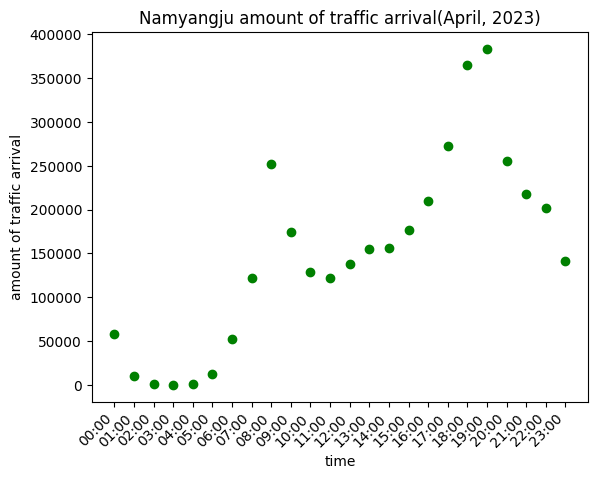

In [ ]:
time_data_namyangju_arrival4 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_namyangju4_arrival = df_namyangju4_arrival

time_data_namyangju_arrival4 = [datetime.strptime(time, '%H:%M') for time in time_data_namyangju_arrival4]

plt.scatter(time_data_namyangju_arrival4, numeric_data_namyangju4_arrival, color='green', marker='o', label='데이터 포인트')

plt.title('Namyangju amount of traffic arrival(April, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_namyangju_arrival4, [time.strftime('%H:%M') for time in time_data_namyangju_arrival4], rotation=45, ha='right')

plt.show()

### 경기도 수원시 목적통행량 분석(4월)

In [ ]:
df_suwon4 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_수원4.xlsx')

df_suwon4 = df_suwon4.drop([1], axis=0)
df_suwon4 = df_suwon4.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_suwon4 = df_suwon4.reset_index(drop=True)

df_suwon4 = df_suwon4.loc[5]
df_suwon4 = df_suwon4.tolist()
df_suwon4_list = df_suwon4[1:]
df_suwon4_list #04시~익일 2시, (발생량,도착량) 순서

[20116,
 2764,
 182662,
 62497,
 479752,
 201303,
 934256,
 374907,
 875945,
 772765,
 583648,
 576721,
 459650,
 445489,
 475087,
 438754,
 517689,
 480586,
 514572,
 528774,
 498295,
 490349,
 563897,
 525844,
 672921,
 616709,
 737148,
 743883,
 784209,
 978885,
 514531,
 877420,
 477969,
 592613,
 420371,
 508529,
 335565,
 453974,
 141189,
 288430,
 23685,
 96717,
 2482,
 11602,
 451,
 1263,
 230,
 237]

In [ ]:
df_suwon4_generation = []
count23 = 1
for i in df_suwon4_list:
    if count23%2 == 1:
        df_suwon4_generation.append(i)
    count23 += 1

df_suwon4_generation #발생량만 뽑은 리스트

df_suwon4_arrival = []
count24 = 1
for i in df_suwon4_list:
    if count24%2 == 0:
        df_suwon4_arrival.append(i)
    count24 += 1

df_suwon4_arrival #도착량만 뽑은 데이터

[2764,
 62497,
 201303,
 374907,
 772765,
 576721,
 445489,
 438754,
 480586,
 528774,
 490349,
 525844,
 616709,
 743883,
 978885,
 877420,
 592613,
 508529,
 453974,
 288430,
 96717,
 11602,
 1263,
 237]

**발생량 vs 도착량 (수원시)**

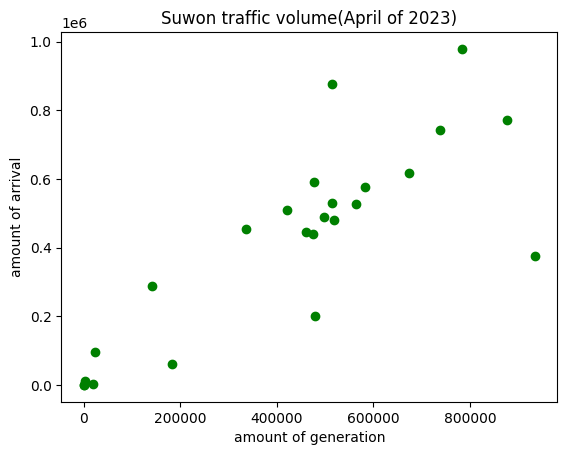

In [ ]:
x_values_suwon4 = df_suwon4_generation
y_values_suwon4 = df_suwon4_arrival

plt.scatter(x_values_suwon4, y_values_suwon4, color='green', marker='o', label='데이터 포인트')

plt.title('Suwon traffic volume(April of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (수원시)**

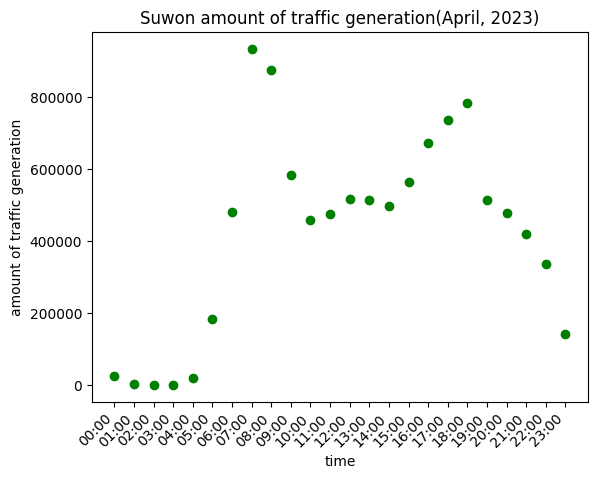

In [ ]:
time_data_suwon_generation4 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_suwon4_generation = df_suwon4_generation

time_data_suwon_generation4 = [datetime.strptime(time, '%H:%M') for time in time_data_suwon_generation4]

plt.scatter(time_data_suwon_generation4, numeric_data_suwon4_generation, color='green', marker='o', label='데이터 포인트')

plt.title('Suwon amount of traffic generation(April, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_suwon_generation4, [time.strftime('%H:%M') for time in time_data_suwon_generation4], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (수원시)**

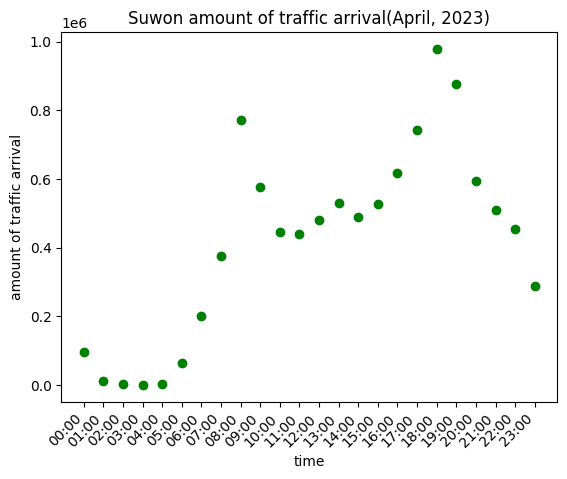

In [ ]:
time_data_suwon_arrival4 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_suwon4_arrival = df_suwon4_arrival

time_data_suwon_arrival4 = [datetime.strptime(time, '%H:%M') for time in time_data_suwon_arrival4]

plt.scatter(time_data_suwon_arrival4, numeric_data_suwon4_arrival, color='green', marker='o', label='데이터 포인트')

plt.title('Suwon amount of traffic arrival(April, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_suwon_arrival4, [time.strftime('%H:%M') for time in time_data_suwon_arrival4], rotation=45, ha='right')

plt.show()

## 7월

### 경기도 용인시 목적통행량 분석(7월)

In [ ]:
df_yongin7 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_용인7.xlsx')

df_yongin7 = df_yongin7.drop([1], axis=0)
df_yongin7 = df_yongin7.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_yongin7 = df_yongin7.reset_index(drop=True)

df_yongin7 = df_yongin7.loc[5]
df_yongin7 = df_yongin7.tolist()
df_yongin7_list = df_yongin7[1:]
df_yongin7_list #04시~익일 2시, (발생량,도착량) 순서

[12573,
 1348,
 88556,
 13742,
 242085,
 57119,
 458136,
 122561,
 378071,
 247065,
 242478,
 164691,
 189671,
 127872,
 180181,
 124248,
 187529,
 136677,
 179364,
 146935,
 166823,
 148512,
 177290,
 166298,
 203072,
 196012,
 229235,
 252847,
 239361,
 352460,
 137366,
 378118,
 115775,
 251719,
 101671,
 218116,
 74944,
 202622,
 31343,
 142862,
 10418,
 59589,
 2610,
 11318,
 421,
 1660]

In [ ]:
df_yongin7_generation = []
count7 = 1
for i in df_yongin7_list:
    if count7%2 == 1:
        df_yongin7_generation.append(i)
    count7 += 1

df_yongin7_generation #발생량만 뽑은 리스트

df_yongin7_arrival = []
count8 = 1
for i in df_yongin7_list:
    if count8%2 == 0:
        df_yongin7_arrival.append(i)
    count8 += 1

df_yongin7_arrival #도착량만 뽑은 데이터

[1348,
 13742,
 57119,
 122561,
 247065,
 164691,
 127872,
 124248,
 136677,
 146935,
 148512,
 166298,
 196012,
 252847,
 352460,
 378118,
 251719,
 218116,
 202622,
 142862,
 59589,
 11318,
 1660]

**발생량 vs 도착량 (용인시)**

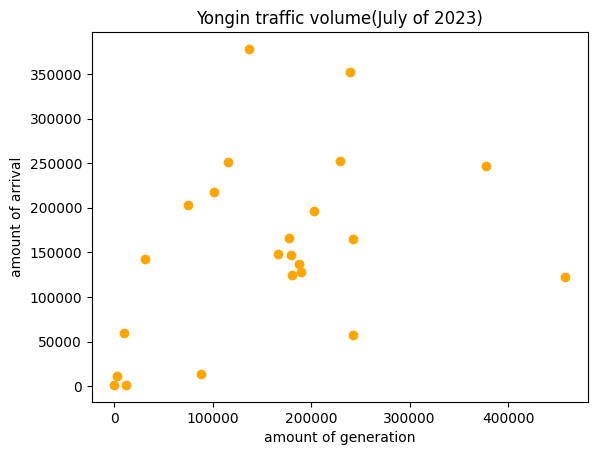

In [ ]:
x_values_yongin7 = df_yongin7_generation
y_values_yongin7 = df_yongin7_arrival

plt.scatter(x_values_yongin7, y_values_yongin7, color='orange', marker='o', label='데이터 포인트')

plt.title('Yongin traffic volume(July of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (용인시)**

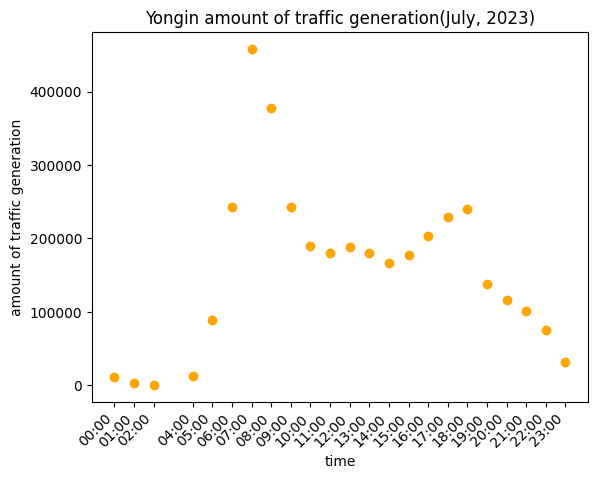

In [ ]:
time_data_yongin_generation7 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00']
numeric_data_yongin7_generation = df_yongin7_generation

time_data_yongin_generation7 = [datetime.strptime(time, '%H:%M') for time in time_data_yongin_generation7]

plt.scatter(time_data_yongin_generation7, numeric_data_yongin7_generation, color='orange', marker='o', label='데이터 포인트')

plt.title('Yongin amount of traffic generation(July, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_yongin_generation7, [time.strftime('%H:%M') for time in time_data_yongin_generation7], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (용인시)**

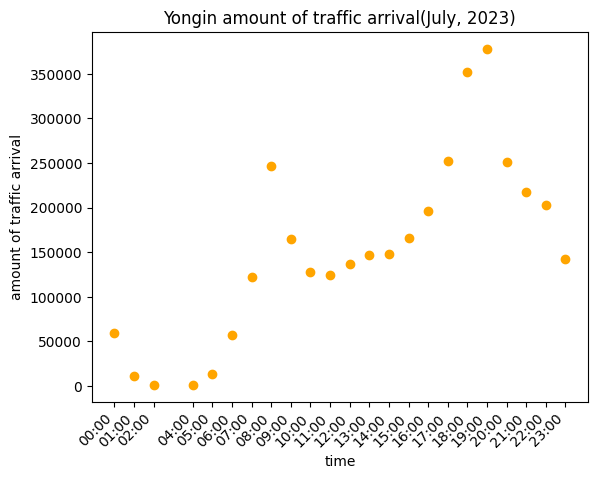

In [ ]:
time_data_yongin_arrival7 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00']
numeric_data_yongin7_arrival = df_yongin7_arrival

time_data_yongin_arrival7 = [datetime.strptime(time, '%H:%M') for time in time_data_yongin_arrival7]

plt.scatter(time_data_yongin_arrival7, numeric_data_yongin7_arrival, color='orange', marker='o', label='데이터 포인트')

plt.title('Yongin amount of traffic arrival(July, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_yongin_arrival7, [time.strftime('%H:%M') for time in time_data_yongin_arrival7], rotation=45, ha='right')

plt.show()

### 경기도 고양시 목적통행량 분석 (7월)

In [ ]:
df_goyang7 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_고양7.xlsx')

df_goyang7 = df_goyang7.drop([1], axis=0)
df_goyang7 = df_goyang7.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_goyang7 = df_goyang7.reset_index(drop=True)

df_goyang7 = df_goyang7.loc[5]
df_goyang7 = df_goyang7.tolist()
df_goyang7_list = df_goyang7[1:]
df_goyang7_list #04시~익일 2시, (발생량,도착량) 순서

[17582,
 3006,
 156635,
 37953,
 444948,
 134768,
 895871,
 257265,
 827680,
 559033,
 509107,
 413518,
 395256,
 317522,
 386104,
 306914,
 406295,
 333974,
 401520,
 369585,
 381020,
 360596,
 417652,
 391395,
 468920,
 447238,
 545803,
 578960,
 578665,
 836031,
 337963,
 779355,
 309932,
 496747,
 282426,
 454651,
 230159,
 425346,
 103455,
 287960,
 32675,
 116665,
 9259,
 26466,
 2654,
 6674,
 516,
 730]

In [ ]:
df_goyang7_generation = []
count9 = 1
for i in df_goyang7_list:
    if count9%2 == 1:
        df_goyang7_generation.append(i)
    count9 += 1

df_goyang7_generation #발생량만 뽑은 리스트

df_goyang7_arrival = []
count10 = 1
for i in df_goyang7_list:
    if count10%2 == 0:
        df_goyang7_arrival.append(i)
    count10 += 1

df_goyang7_arrival #도착량만 뽑은 데이터

[3006,
 37953,
 134768,
 257265,
 559033,
 413518,
 317522,
 306914,
 333974,
 369585,
 360596,
 391395,
 447238,
 578960,
 836031,
 779355,
 496747,
 454651,
 425346,
 287960,
 116665,
 26466,
 6674,
 730]

**발생량 vs 도착량 (고양시)**

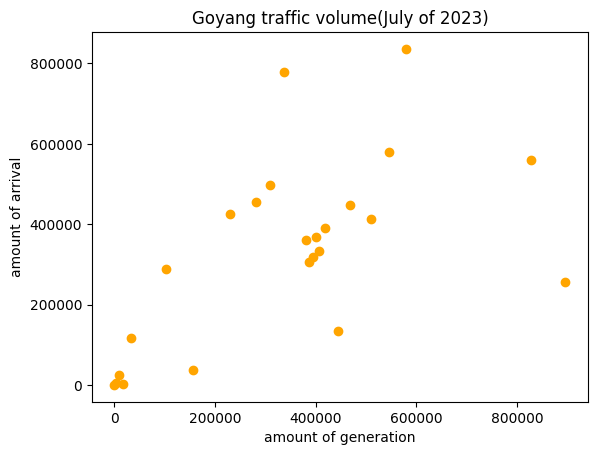

In [ ]:
x_values_goyang7 = df_goyang7_generation
y_values_goyang7 = df_goyang7_arrival

plt.scatter(x_values_goyang7, y_values_goyang7, color='orange', marker='o', label='데이터 포인트')

plt.title('Goyang traffic volume(July of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (고양시)**

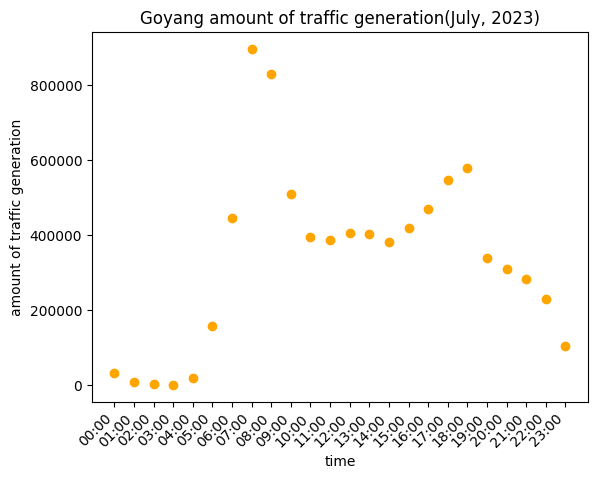

In [ ]:
time_data_goyang_generation7 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_goyang7_generation = df_goyang7_generation

time_data_goyang_generation7 = [datetime.strptime(time, '%H:%M') for time in time_data_goyang_generation7]

plt.scatter(time_data_goyang_generation7, numeric_data_goyang7_generation, color='orange', marker='o', label='데이터 포인트')

plt.title('Goyang amount of traffic generation(July, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_goyang_generation7, [time.strftime('%H:%M') for time in time_data_goyang_generation7], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (고양시)**

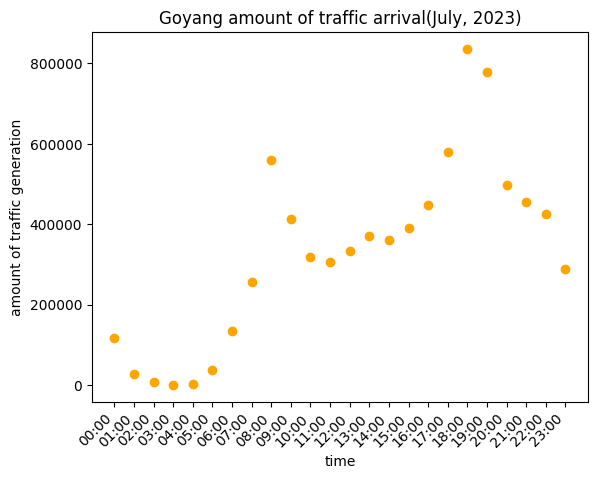

In [ ]:
time_data_goyang_arrival7 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_goyang7_generation = df_goyang7_arrival

time_data_goyang_arrival7 = [datetime.strptime(time, '%H:%M') for time in time_data_goyang_arrival7]

plt.scatter(time_data_goyang_arrival7, numeric_data_goyang7_generation, color='orange', marker='o', label='데이터 포인트')

plt.title('Goyang amount of traffic arrival(July, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_goyang_arrival7, [time.strftime('%H:%M') for time in time_data_goyang_arrival7], rotation=45, ha='right')

plt.show()

### 경기도 남양주시 목적통행량 분석 (7월)

In [ ]:
df_namyangju7 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_남양주7.xlsx')

df_namyangju7 = df_namyangju7.drop([1], axis=0)
df_namyangju7 = df_namyangju7.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_namyangju7 = df_namyangju7.reset_index(drop=True)

df_namyangju7 = df_namyangju7.loc[5]
df_namyangju7 = df_namyangju7.tolist()
df_namyangju7_list = df_namyangju7[1:]
df_namyangju7_list #04시~익일 2시, (발생량,도착량) 순서

[12573,
 1348,
 88556,
 13742,
 242085,
 57119,
 458136,
 122561,
 378071,
 247065,
 242478,
 164691,
 189671,
 127872,
 180181,
 124248,
 187529,
 136677,
 179364,
 146935,
 166823,
 148512,
 177290,
 166298,
 203072,
 196012,
 229235,
 252847,
 239361,
 352460,
 137366,
 378118,
 115775,
 251719,
 101671,
 218116,
 74944,
 202622,
 31343,
 142862,
 10418,
 59589,
 2610,
 11318,
 421,
 1660]

In [ ]:
df_namyangju7_generation = []
count11 = 1
for i in df_namyangju7_list:
    if count11%2 == 1:
        df_namyangju7_generation.append(i)
    count11 += 1

df_namyangju7_generation #발생량만 뽑은 리스트

df_namyangju7_arrival = []
count12 = 1
for i in df_namyangju7_list:
    if count12%2 == 0:
        df_namyangju7_arrival.append(i)
    count12 += 1

df_namyangju7_arrival #도착량만 뽑은 데이터

[1348,
 13742,
 57119,
 122561,
 247065,
 164691,
 127872,
 124248,
 136677,
 146935,
 148512,
 166298,
 196012,
 252847,
 352460,
 378118,
 251719,
 218116,
 202622,
 142862,
 59589,
 11318,
 1660]

**발생량 vs 도착량 (남양주시)**

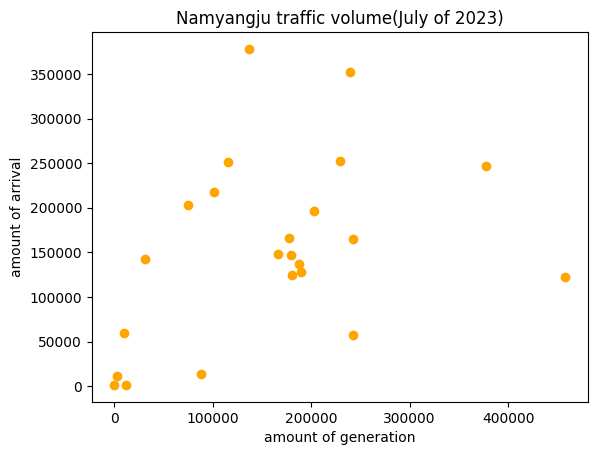

In [ ]:
x_values_namyangju7 = df_namyangju7_generation
y_values_namyangju7 = df_namyangju7_arrival

plt.scatter(x_values_namyangju7, y_values_namyangju7, color='orange', marker='o', label='데이터 포인트')

plt.title('Namyangju traffic volume(July of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (남양주시)**

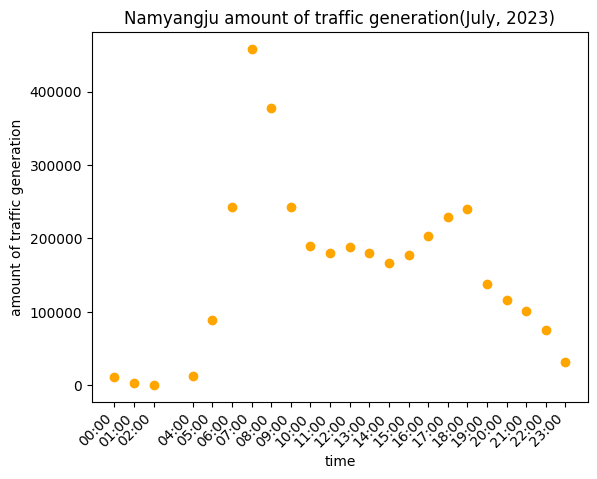

In [ ]:
time_data_namyangju_generation7 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00']
numeric_data_namyangju7_generation = df_namyangju7_generation

time_data_namyangju_generation7 = [datetime.strptime(time, '%H:%M') for time in time_data_namyangju_generation7]

plt.scatter(time_data_namyangju_generation7, numeric_data_namyangju7_generation, color='orange', marker='o', label='데이터 포인트')

plt.title('Namyangju amount of traffic generation(July, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_namyangju_generation7, [time.strftime('%H:%M') for time in time_data_namyangju_generation7], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (남양주시)**

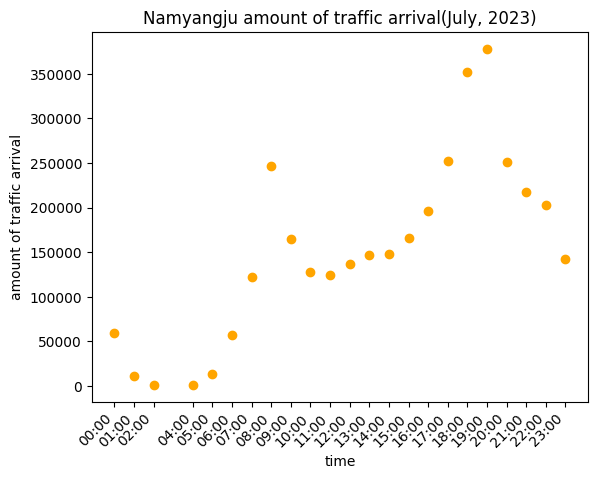

In [ ]:
time_data_namyangju_arrival7 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00']
numeric_data_namyangju7_arrival = df_namyangju7_arrival

time_data_namyangju_arrival7 = [datetime.strptime(time, '%H:%M') for time in time_data_namyangju_arrival7]

plt.scatter(time_data_namyangju_arrival7, numeric_data_namyangju7_arrival, color='orange', marker='o', label='데이터 포인트')

plt.title('Namyangju amount of traffic arrival(July, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_namyangju_arrival7, [time.strftime('%H:%M') for time in time_data_namyangju_arrival7], rotation=45, ha='right')

plt.show()

### 경기도 수원시 목적통행량 분석(7월)

In [ ]:
df_suwon7 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_수원7.xlsx')

df_suwon7 = df_suwon7.drop([1], axis=0)
df_suwon7 = df_suwon7.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_suwon7 = df_suwon7.reset_index(drop=True)

df_suwon7 = df_suwon7.loc[5]
df_suwon7 = df_suwon7.tolist()
df_suwon7_list = df_suwon7[1:]
df_suwon7_list #04시~익일 2시, (발생량,도착량) 순서

[22190,
 2779,
 194825,
 64487,
 499945,
 200501,
 916855,
 369444,
 835050,
 721877,
 552522,
 544216,
 438078,
 419882,
 451641,
 416746,
 484159,
 457654,
 481291,
 485387,
 472163,
 466710,
 530005,
 501313,
 620487,
 579545,
 706948,
 709695,
 762673,
 964247,
 484134,
 865141,
 464714,
 572716,
 418763,
 502526,
 339064,
 457429,
 141773,
 291313,
 24829,
 103486,
 2717,
 13110,
 567,
 1468,
 298,
 305]

In [ ]:
df_suwon7_generation = []
count15 = 1
for i in df_suwon7_list:
    if count15%2 == 1:
        df_suwon7_generation.append(i)
    count15 += 1

df_suwon7_generation #발생량만 뽑은 리스트

df_suwon7_arrival = []
count16 = 1
for i in df_suwon7_list:
    if count16%2 == 0:
        df_suwon7_arrival.append(i)
    count16 += 1

df_suwon7_arrival #도착량만 뽑은 데이터

[2779,
 64487,
 200501,
 369444,
 721877,
 544216,
 419882,
 416746,
 457654,
 485387,
 466710,
 501313,
 579545,
 709695,
 964247,
 865141,
 572716,
 502526,
 457429,
 291313,
 103486,
 13110,
 1468,
 305]

**발생량 vs 도착량 (수원시)**

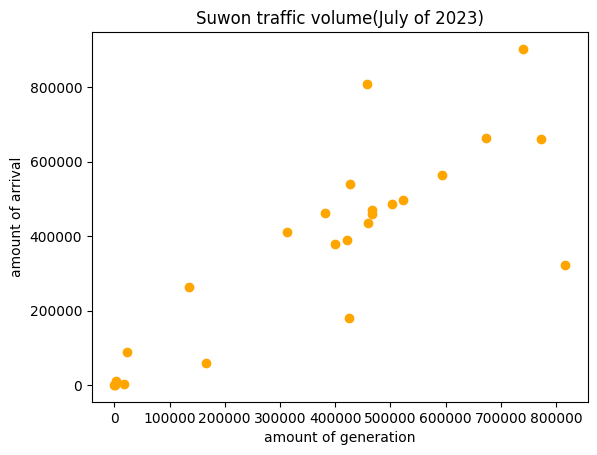

In [ ]:
x_values_suwon7 = df_suwon7_generation
y_values_suwon7 = df_suwon7_arrival

plt.scatter(x_values_suwon, y_values_suwon, color='orange', marker='o', label='데이터 포인트')

plt.title('Suwon traffic volume(July of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (수원시)**

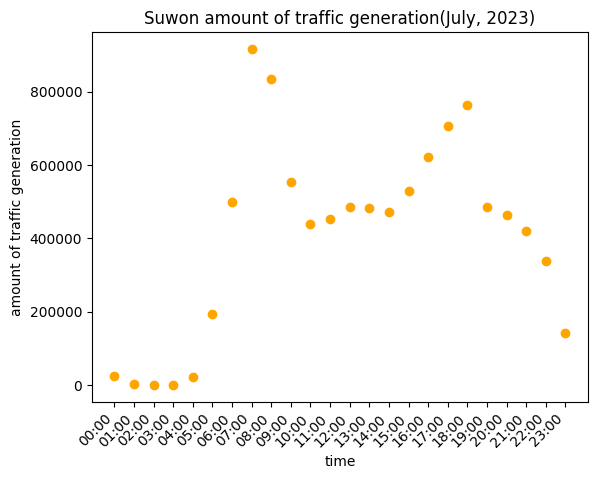

In [ ]:
time_data_suwon_generation7 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_suwon7_generation = df_suwon7_generation

time_data_suwon_generation7 = [datetime.strptime(time, '%H:%M') for time in time_data_suwon_generation7]

plt.scatter(time_data_suwon_generation7, numeric_data_suwon7_generation, color='orange', marker='o', label='데이터 포인트')

plt.title('Suwon amount of traffic generation(July, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_suwon_generation7, [time.strftime('%H:%M') for time in time_data_suwon_generation7], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (수원시)**

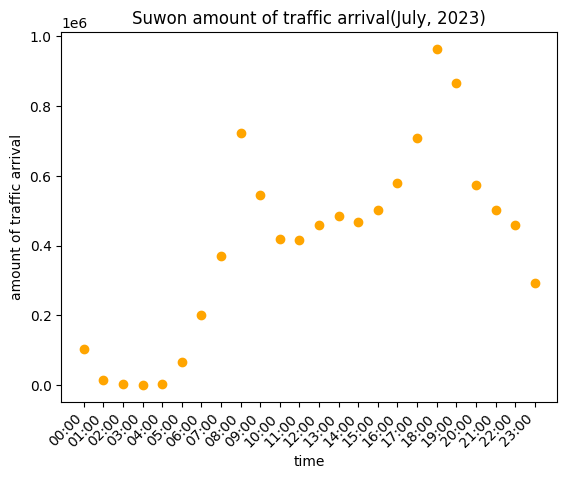

In [ ]:
time_data_suwon_arrival7 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_suwon7_arrival = df_suwon7_arrival

time_data_suwon_arrival7 = [datetime.strptime(time, '%H:%M') for time in time_data_suwon_arrival7]

plt.scatter(time_data_suwon_arrival7, numeric_data_suwon7_arrival, color='orange', marker='o', label='데이터 포인트')

plt.title('Suwon amount of traffic arrival(July, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_suwon_arrival7, [time.strftime('%H:%M') for time in time_data_suwon_arrival7], rotation=45, ha='right')

plt.show()

## 11월

### 경기도 용인시 목적통행량 분석(11월)

In [ ]:
df_yongin11 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_용인11.xlsx')

df_yongin11 = df_yongin11.drop([1], axis=0)
df_yongin11 = df_yongin11.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_yongin11 = df_yongin11.reset_index(drop=True)

df_yongin11 = df_yongin11.loc[5]
df_yongin11 = df_yongin11.tolist()
df_yongin11_list = df_yongin11[1:]
df_yongin11_list #04시~익일 2시, (발생량,도착량) 순서

[1910,
 34,
 88303,
 18207,
 335367,
 89418,
 695181,
 206815,
 707072,
 438796,
 449806,
 299744,
 316173,
 227736,
 295551,
 217132,
 306046,
 235860,
 294749,
 260523,
 293054,
 263969,
 319710,
 290977,
 370348,
 351689,
 431278,
 458546,
 420803,
 645432,
 255682,
 605817,
 223181,
 420083,
 186292,
 346678,
 147025,
 331805,
 64438,
 234645,
 13218,
 87275,
 856,
 6092,
 77,
 378,
 0,
 1]

In [ ]:
df_yongin11_generation = []
count25 = 1
for i in df_yongin11_list:
    if count25%2 == 1:
        df_yongin11_generation.append(i)
    count25 += 1

df_yongin11_generation #발생량만 뽑은 리스트

df_yongin11_arrival = []
count26 = 1
for i in df_yongin11_list:
    if count26%2 == 0:
        df_yongin11_arrival.append(i)
    count26 += 1

df_yongin11_arrival #도착량만 뽑은 데이터

[34,
 18207,
 89418,
 206815,
 438796,
 299744,
 227736,
 217132,
 235860,
 260523,
 263969,
 290977,
 351689,
 458546,
 645432,
 605817,
 420083,
 346678,
 331805,
 234645,
 87275,
 6092,
 378,
 1]

**발생량 vs 도착량 (용인시)**

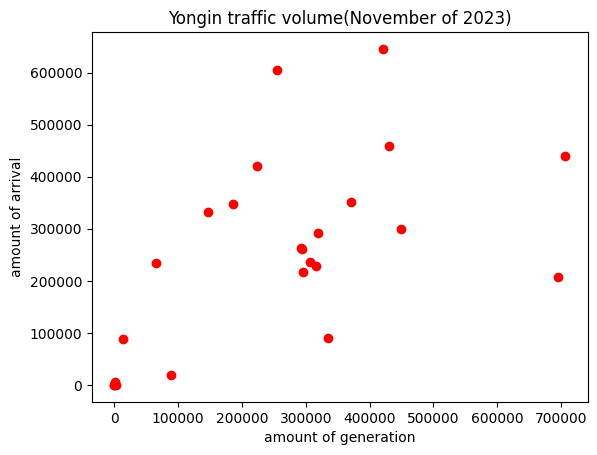

In [ ]:
x_values_yongin11 = df_yongin11_generation
y_values_yongin11 = df_yongin11_arrival

plt.scatter(x_values_yongin11, y_values_yongin11, color='red', marker='o', label='데이터 포인트')

plt.title('Yongin traffic volume(November of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (용인시)**

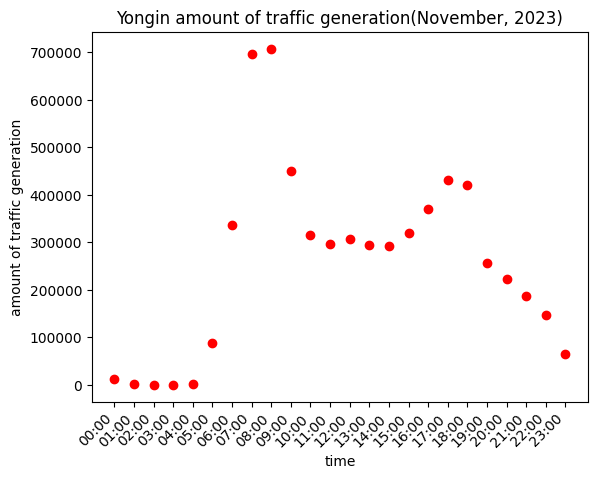

In [ ]:
time_data_yongin_generation11 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_yongin11_generation = df_yongin11_generation

time_data_yongin_generation11 = [datetime.strptime(time, '%H:%M') for time in time_data_yongin_generation11]

plt.scatter(time_data_yongin_generation11, numeric_data_yongin11_generation, color='red', marker='o', label='데이터 포인트')

plt.title('Yongin amount of traffic generation(November, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_yongin_generation11, [time.strftime('%H:%M') for time in time_data_yongin_generation11], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (용인시)**

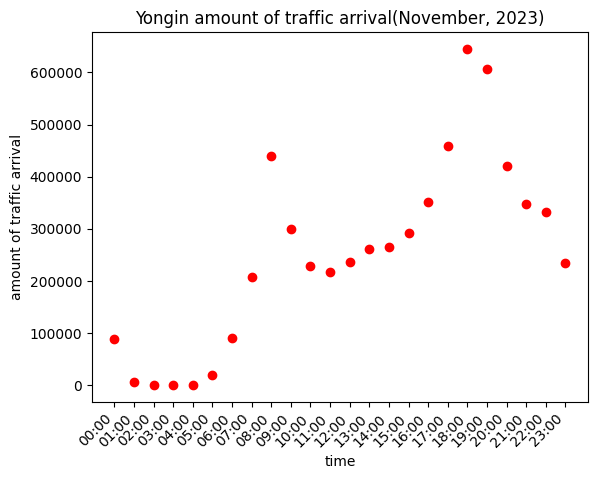

In [ ]:
time_data_yongin_arrival11 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_yongin11_arrival = df_yongin11_arrival

time_data_yongin_arrival11 = [datetime.strptime(time, '%H:%M') for time in time_data_yongin_arrival11]

plt.scatter(time_data_yongin_arrival11, numeric_data_yongin11_arrival, color='red', marker='o', label='데이터 포인트')

plt.title('Yongin amount of traffic arrival(November, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_yongin_arrival11, [time.strftime('%H:%M') for time in time_data_yongin_arrival11], rotation=45, ha='right')

plt.show()

### 경기도 고양시 목적통행량 분석(11월)

In [ ]:
df_goyang11 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_고양11.xlsx')

df_goyang11 = df_goyang11.drop([1], axis=0)
df_goyang11 = df_goyang11.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_goyang11 = df_goyang11.reset_index(drop=True)

df_goyang11 = df_goyang11.loc[5]
df_goyang11 = df_goyang11.tolist()
df_goyang11_list = df_goyang11[1:]
df_goyang11_list #04시~익일 2시, (발생량,도착량) 순서

[18320,
 3000,
 157303,
 35809,
 450808,
 132695,
 946520,
 256033,
 889377,
 571689,
 537670,
 422757,
 398113,
 313264,
 380895,
 285570,
 396828,
 315748,
 393457,
 361634,
 379161,
 359661,
 419338,
 399363,
 486481,
 466486,
 565086,
 615913,
 572161,
 864450,
 317969,
 793968,
 282110,
 507021,
 252050,
 446364,
 210740,
 413846,
 91512,
 279250,
 27551,
 110814,
 7752,
 24603,
 2087,
 5406,
 430,
 615]

In [ ]:
df_goyang11_generation = []
count27 = 1
for i in df_goyang11_list:
    if count27%2 == 1:
        df_goyang11_generation.append(i)
    count27 += 1

df_goyang11_generation #발생량만 뽑은 리스트

df_goyang11_arrival = []
count28 = 1
for i in df_goyang11_list:
    if count28%2 == 0:
        df_goyang11_arrival.append(i)
    count28 += 1

df_goyang11_arrival #도착량만 뽑은 데이터

[3000,
 35809,
 132695,
 256033,
 571689,
 422757,
 313264,
 285570,
 315748,
 361634,
 359661,
 399363,
 466486,
 615913,
 864450,
 793968,
 507021,
 446364,
 413846,
 279250,
 110814,
 24603,
 5406,
 615]

**발생량 vs 도착량 (고양시)**

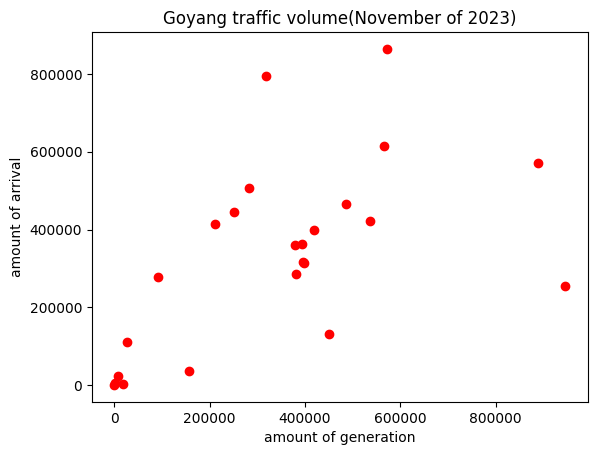

In [ ]:
x_values_goyang11 = df_goyang11_generation
y_values_goyang11 = df_goyang11_arrival

plt.scatter(x_values_goyang11, y_values_goyang11, color='red', marker='o', label='데이터 포인트')

plt.title('Goyang traffic volume(November of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (고양시)**

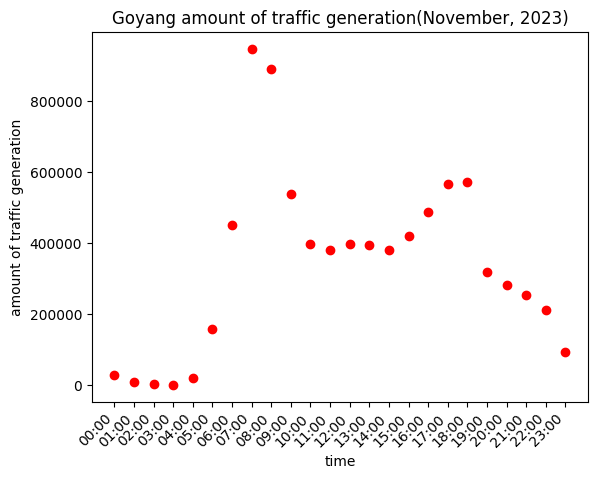

In [ ]:
time_data_goyang_generation11 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_goyang11_generation = df_goyang11_generation

time_data_goyang_generation11 = [datetime.strptime(time, '%H:%M') for time in time_data_goyang_generation11]

plt.scatter(time_data_goyang_generation11, numeric_data_goyang11_generation, color='red', marker='o', label='데이터 포인트')

plt.title('Goyang amount of traffic generation(November, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_goyang_generation11, [time.strftime('%H:%M') for time in time_data_goyang_generation11], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (고양시)**

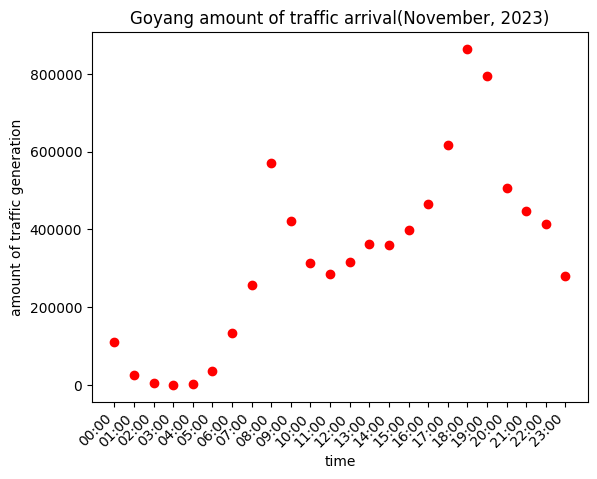

In [ ]:
time_data_goyang_arrival11 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_goyang11_arrival = df_goyang11_arrival

time_data_goyang_arrival11 = [datetime.strptime(time, '%H:%M') for time in time_data_goyang_arrival11]

plt.scatter(time_data_goyang_arrival11, numeric_data_goyang11_arrival, color='red', marker='o', label='데이터 포인트')

plt.title('Goyang amount of traffic arrival(November, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_goyang_arrival11, [time.strftime('%H:%M') for time in time_data_goyang_arrival11], rotation=45, ha='right')

plt.show()

### 경기도 남양주시 목적통행량 분석(11월)

In [ ]:
df_namyangju11 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_남양주11.xlsx')

df_namyangju11 = df_namyangju11.drop([1], axis=0)
df_namyangju11 = df_namyangju11.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_namyangju11 = df_namyangju11.reset_index(drop=True)

df_namyangju11 = df_namyangju11.loc[5]
df_namyangju11 = df_namyangju11.tolist()
df_namyangju11_list = df_namyangju11[1:]
df_namyangju11_list #04시~익일 2시, (발생량,도착량) 순서

[12228,
 1234,
 89605,
 11879,
 242834,
 53163,
 487545,
 121764,
 410447,
 257083,
 255372,
 173254,
 191657,
 123136,
 178820,
 115016,
 190259,
 132563,
 178592,
 150909,
 164434,
 151172,
 182395,
 174096,
 219581,
 209729,
 244282,
 276955,
 239062,
 375521,
 129169,
 395773,
 106579,
 254885,
 93955,
 214226,
 70173,
 197375,
 28772,
 137526,
 9233,
 56257,
 2293,
 10319,
 356,
 1568,
 6,
 24]

In [ ]:
df_namyangju11_generation = []
count29 = 1
for i in df_namyangju11_list:
    if count29%2 == 1:
        df_namyangju11_generation.append(i)
    count29 += 1

df_namyangju11_generation #발생량만 뽑은 리스트

df_namyangju11_arrival = []
count30 = 1
for i in df_namyangju11_list:
    if count30%2 == 0:
        df_namyangju11_arrival.append(i)
    count30 += 1

df_namyangju11_arrival #도착량만 뽑은 데이터

[1234,
 11879,
 53163,
 121764,
 257083,
 173254,
 123136,
 115016,
 132563,
 150909,
 151172,
 174096,
 209729,
 276955,
 375521,
 395773,
 254885,
 214226,
 197375,
 137526,
 56257,
 10319,
 1568,
 24]

**발생량 vs 도착량 (남양주시)**

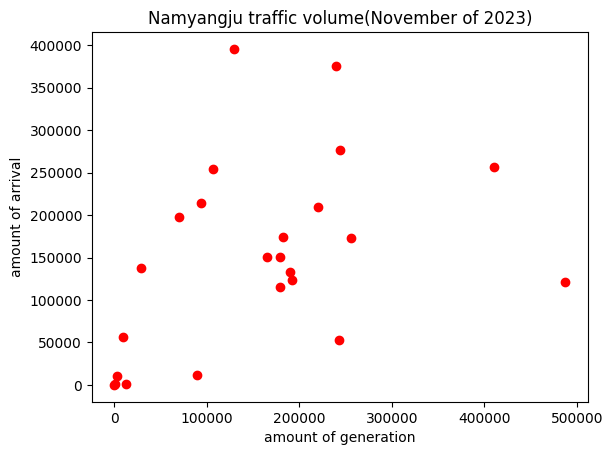

In [ ]:
x_values_namyangju11 = df_namyangju11_generation
y_values_namyangju11 = df_namyangju11_arrival

plt.scatter(x_values_namyangju11, y_values_namyangju11, color='red', marker='o', label='데이터 포인트')

plt.title('Namyangju traffic volume(November of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (남양주시)**

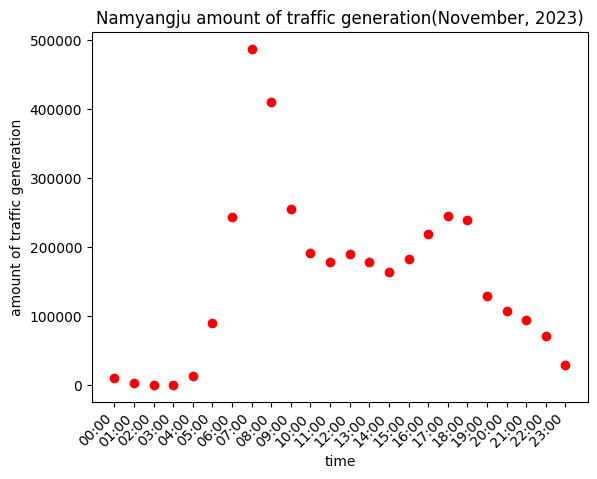

In [ ]:
time_data_namyangju_generation11 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_namyangju11_generation = df_namyangju11_generation

time_data_namyangju_generation11 = [datetime.strptime(time, '%H:%M') for time in time_data_namyangju_generation11]

plt.scatter(time_data_namyangju_generation11, numeric_data_namyangju11_generation, color='red', marker='o', label='데이터 포인트')

plt.title('Namyangju amount of traffic generation(November, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_namyangju_generation11, [time.strftime('%H:%M') for time in time_data_namyangju_generation11], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (남양주시)**

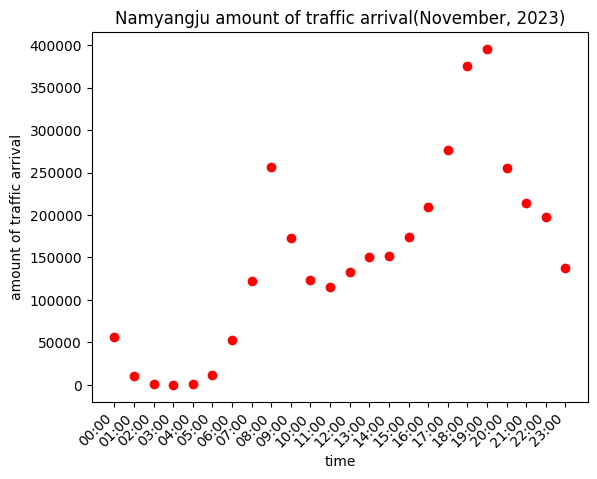

In [ ]:
time_data_namyangju_arrival11 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_namyangju11_arrival = df_namyangju11_arrival

time_data_namyangju_arrival11 = [datetime.strptime(time, '%H:%M') for time in time_data_namyangju_arrival11]

plt.scatter(time_data_namyangju_arrival11, numeric_data_namyangju11_arrival, color='red', marker='o', label='데이터 포인트')

plt.title('Namyangju amount of traffic arrival(November, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_namyangju_arrival11, [time.strftime('%H:%M') for time in time_data_namyangju_arrival11], rotation=45, ha='right')

plt.show()

### 경기도 수원시 목적통행량 분석(11월)

In [ ]:
df_suwon11 = pd.read_excel('/content/drive/MyDrive/DSL/24-1/EDA Project/이용량 지표(목적통행량)_수원11.xlsx')

df_suwon11 = df_suwon11.drop([1], axis=0)
df_suwon11 = df_suwon11.drop(['시간대:','Unnamed: 1','Unnamed: 2','Unnamed: 4','Unnamed: 6','합계'], axis=1)
df_suwon11 = df_suwon11.reset_index(drop=True)

df_suwon11 = df_suwon11.loc[5]
df_suwon11 = df_suwon11.tolist()
df_suwon11_list = df_suwon11[1:]
df_suwon11_list #04시~익일 2시, (발생량,도착량) 순서

[22549,
 2670,
 197069,
 65183,
 508305,
 199659,
 970273,
 384478,
 909937,
 791936,
 587185,
 587756,
 449205,
 439721,
 459672,
 418483,
 504853,
 464195,
 502941,
 513114,
 492656,
 480727,
 568750,
 522001,
 689363,
 617523,
 763570,
 767025,
 790878,
 1018367,
 492957,
 892856,
 457716,
 591246,
 397366,
 492488,
 324710,
 441165,
 134600,
 285110,
 23329,
 99541,
 2516,
 12384,
 433,
 1224,
 262,
 290]

In [ ]:
df_suwon11_generation = []
count31 = 1
for i in df_suwon11_list:
    if count31%2 == 1:
        df_suwon11_generation.append(i)
    count31 += 1

df_suwon11_generation #발생량만 뽑은 리스트

df_suwon11_arrival = []
count32 = 1
for i in df_suwon11_list:
    if count32%2 == 0:
        df_suwon11_arrival.append(i)
    count32 += 1

df_suwon11_arrival #도착량만 뽑은 데이터

[2670,
 65183,
 199659,
 384478,
 791936,
 587756,
 439721,
 418483,
 464195,
 513114,
 480727,
 522001,
 617523,
 767025,
 1018367,
 892856,
 591246,
 492488,
 441165,
 285110,
 99541,
 12384,
 1224,
 290]

**발생량 vs 도착량 (수원시)**

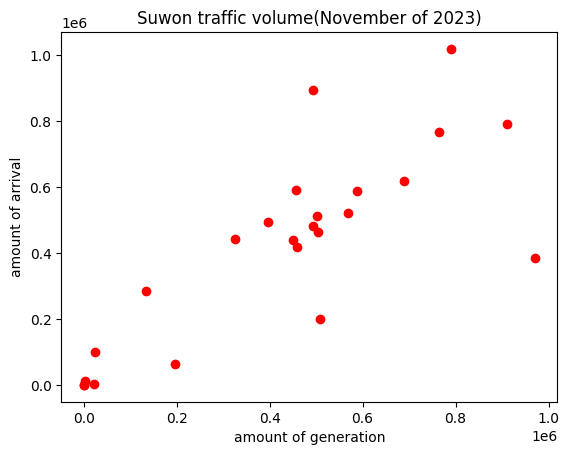

In [ ]:
x_values_suwon11 = df_suwon11_generation
y_values_suwon11 = df_suwon11_arrival

plt.scatter(x_values_suwon11, y_values_suwon11, color='red', marker='o', label='데이터 포인트')

plt.title('Suwon traffic volume(November of 2023)')
plt.xlabel('amount of generation')
plt.ylabel('amount of arrival')

plt.show()

**시간에 따른 교통 발생량 시각화 (수원시)**

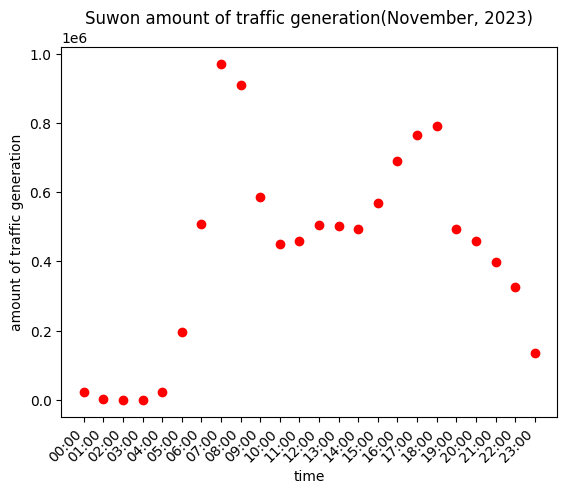

In [ ]:
time_data_suwon_generation11 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_suwon11_generation = df_suwon11_generation

time_data_suwon_generation11 = [datetime.strptime(time, '%H:%M') for time in time_data_suwon_generation11]

plt.scatter(time_data_suwon_generation11, numeric_data_suwon11_generation, color='red', marker='o', label='데이터 포인트')

plt.title('Suwon amount of traffic generation(November, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic generation')

plt.xticks(time_data_suwon_generation11, [time.strftime('%H:%M') for time in time_data_suwon_generation11], rotation=45, ha='right')

plt.show()

**시간에 따른 교통 도착량 시각화 (수원시)**

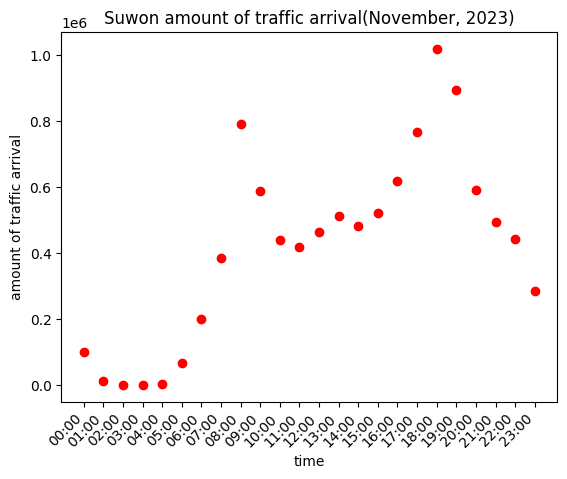

In [ ]:
time_data_suwon_arrival11 = ['4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00',
             '20:00', '21:00','22:00', '23:00', '00:00', '1:00', '2:00', '3:00']
numeric_data_suwon11_arrival = df_suwon11_arrival

time_data_suwon_arrival11 = [datetime.strptime(time, '%H:%M') for time in time_data_suwon_arrival11]

plt.scatter(time_data_suwon_arrival11, numeric_data_suwon11_arrival, color='red', marker='o', label='데이터 포인트')

plt.title('Suwon amount of traffic arrival(November, 2023)')
plt.xlabel('time')
plt.ylabel('amount of traffic arrival')

plt.xticks(time_data_suwon_arrival11, [time.strftime('%H:%M') for time in time_data_suwon_arrival11], rotation=45, ha='right')

plt.show()

## testing(교통량)
1. 정규성 확인(Shapiro - Wilk test(표본수가 적을 때 사용 - 50 미만) (정규성X → Wilcoxon rank-sum test(윌콕슨 순위합 검정))
2. 등분산성 확인 (정규성O → Bartlett's test(바틀렛 검정), 정규성X → Levene's test(레빈 검정))
3. 정규성과 등분산성 만족 → t - test / 정규성은 만족인데 이분산 → Welch's t - test(기존 t - test에 equal_var=False 추가)

In [ ]:
!pip install statsmodels

### 용인시 vs 남양주시

#### 1월

**교통 발생량 비교(1월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

from scipy.stats import shapiro

statistic1, p_value1 = shapiro(df_yongin_generation)
statistic2, p_value2 = shapiro(df_namyangju_generation)

print("Shapiro-Wilk 검정 결과 for 용인시 1월 교통 발생량:")
print("Statistic:", statistic1)
print("P-value:", p_value1)
if p_value1 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 1월 교통 발생량:")
print("Statistic:", statistic2)
print("P-value:", p_value2)
if p_value2 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 1월 교통 발생량:
Statistic: 0.9302555918693542
P-value: 0.11076387763023376
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 1월 교통 발생량:
Statistic: 0.9288172125816345
P-value: 0.10311724990606308
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

from scipy.stats import bartlett

statistic3, p_value3 = bartlett(df_yongin_generation, df_namyangju_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic3)
print("P-value:", p_value3)
if p_value3 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 4.138159707471823
P-value: 0.04192672641610024
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 용인시와 남양주시의 교통 발생량의 평균 차이 비교(1월)

from scipy.stats import ttest_ind

statistic4, p_value4 = ttest_ind(df_yongin_generation, df_namyangju_generation, equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic4)
print("P-value:", p_value4)
if p_value4 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 2.13948684846336
P-value: 0.03897827569675043
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 도착량의 중앙값 차이 비교(1월)

from scipy.stats import mannwhitneyu

statistic131, p_value131 = mannwhitneyu(df_yongin_generation, df_namyangju_generation)

print("Mann-Whitney U Statistic:", statistic131)
print("P-value:", p_value131)

if p_value131 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 355.0
P-value: 0.04801606175747826
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


**교통 도착량 비교(1월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic5, p_value5 = shapiro(df_yongin_arrival)
statistic6, p_value6 = shapiro(df_namyangju_arrival)

print("Shapiro-Wilk 검정 결과 for 용인시 1월 교통 도착량:")
print("Statistic:", statistic5)
print("P-value:", p_value5)
if p_value5 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 1월 교통 도착량:")
print("Statistic:", statistic6)
print("P-value:", p_value6)
if p_value6 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 1월 교통 도착량:
Statistic: 0.9474545121192932
P-value: 0.2589174807071686
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 1월 교통 도착량:
Statistic: 0.9517678022384644
P-value: 0.3182793855667114
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic7, p_value7 = bartlett(df_yongin_arrival, df_namyangju_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic7)
print("P-value:", p_value7)
if p_value7 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 4.727400400215204
P-value: 0.029685720721260786
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 용인시와 남양주시의 교통 발생량의 평균 차이 비교(1월)

statistic8, p_value8 = ttest_ind(df_yongin_arrival, df_namyangju_arrival, equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic8)
print("P-value:", p_value8)
if p_value8 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 2.238626232688625
P-value: 0.03132341623792173
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 도착량의 중앙값 차이 비교(1월)

statistic130, p_value130 = mannwhitneyu(df_yongin_arrival, df_namyangju_arrival)

print("Mann-Whitney U Statistic:", statistic130)
print("P-value:", p_value130)

if p_value130 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 357.0
P-value: 0.04326272780691069
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


#### 4월

**교통 발생량 비교(4월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic25, p_value25 = shapiro(df_yongin4_generation)
statistic26, p_value26 = shapiro(df_namyangju4_generation)

print("Shapiro-Wilk 검정 결과 for 용인시 4월 교통 발생량:")
print("Statistic:", statistic25)
print("P-value:", p_value25)
if p_value25 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 4월 교통 발생량:")
print("Statistic:", statistic26)
print("P-value:", p_value26)
if p_value26 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 4월 교통 발생량:
Statistic: 0.923538088798523
P-value: 0.0699663832783699
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 4월 교통 발생량:
Statistic: 0.9202001094818115
P-value: 0.05900674685835838
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic27, p_value27 = bartlett(df_yongin4_generation, df_namyangju4_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic27)
print("P-value:", p_value27)
if p_value27 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 14.33194577161338
P-value: 0.00015324220457147848
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 용인시와 남양주시의 교통 발생량의 평균 차이 비교(4월)

statistic28, p_value28 = ttest_ind(df_yongin4_generation, df_namyangju4_generation, equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic28)
print("P-value:", p_value28)
if p_value28 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 4.285272664410058
P-value: 0.00016203298850300162
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 남양주시의 교통 발생량의 중앙값 차이 비교(4월)

statistic132, p_value132 = mannwhitneyu(df_yongin4_generation, df_namyangju4_generation)

print("Mann-Whitney U Statistic:", statistic132)
print("P-value:", p_value132)

if p_value132 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 443.0
P-value: 0.0014438613414250558
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


**교통 도착량 비교(4월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic29, p_value29 = shapiro(df_yongin4_arrival)
statistic30, p_value30 = shapiro(df_namyangju4_arrival)

print("Shapiro-Wilk 검정 결과 for 용인시 4월 교통 도착량:")
print("Statistic:", statistic29)
print("P-value:", p_value29)
if p_value29 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 4월 교통 도착량:")
print("Statistic:", statistic30)
print("P-value:", p_value30)
if p_value30 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 4월 교통 도착량:
Statistic: 0.9396905303001404
P-value: 0.16055308282375336
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 4월 교통 도착량:
Statistic: 0.9448269605636597
P-value: 0.20877157151699066
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic31, p_value31 = bartlett(df_yongin4_arrival, df_namyangju4_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic31)
print("P-value:", p_value31)
if p_value31 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 18.20493542451624
P-value: 1.9836413495868264e-05
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 용인시와 남양주시의 교통 발생량의 평균 차이 비교(4월)

statistic32, p_value32 = ttest_ind(df_yongin4_generation, df_namyangju4_generation, equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic32)
print("P-value:", p_value32)
if p_value32 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 4.285272664410058
P-value: 0.00016203298850300162
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 남양주시의 교통 도착량의 중앙값 차이 비교(4월)

statistic133, p_value133 = mannwhitneyu(df_yongin4_arrival, df_namyangju4_arrival)

print("Mann-Whitney U Statistic:", statistic133)
print("P-value:", p_value133)

if p_value133 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 445.0
P-value: 0.0012510612291407744
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


#### 7월

**교통 발생량 비교(7월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic37, p_value37 = shapiro(df_yongin7_generation)
statistic38, p_value38 = shapiro(df_namyangju7_generation)

print("Shapiro-Wilk 검정 결과 for 용인시 7월 교통 발생량:")
print("Statistic:", statistic37)
print("P-value:", p_value37)
if p_value37 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 7월 교통 발생량:")
print("Statistic:", statistic38)
print("P-value:", p_value38)
if p_value38 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 7월 교통 발생량:
Statistic: 0.9288751482963562
P-value: 0.10341496020555496
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 7월 교통 발생량:
Statistic: 0.9288751482963562
P-value: 0.10341496020555496
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic39, p_value39 = bartlett(df_yongin7_generation, df_namyangju7_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic39)
print("P-value:", p_value39)
if p_value39 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.0
P-value: 1.0
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 용인시와 남양주시의 교통 발생량의 평균 차이 비교(7월)

statistic42, p_value42 = ttest_ind(df_yongin7_generation, df_namyangju7_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic42)
print("P-value:", p_value42)
if p_value42 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 0.0
P-value: 1.0
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 남양주시의 교통 발생량의 중앙값 차이 비교(7월)

statistic134, p_value134 = mannwhitneyu(df_yongin7_generation, df_namyangju7_generation)

print("Mann-Whitney U Statistic:", statistic134)
print("P-value:", p_value134)

if p_value134 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 264.5
P-value: 1.0
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**교통 도착량 비교(7월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic33, p_value33 = shapiro(df_yongin7_arrival)
statistic34, p_value34 = shapiro(df_namyangju7_arrival)

print("Shapiro-Wilk 검정 결과 for 용인시 7월 교통 도착량:")
print("Statistic:", statistic33)
print("P-value:", p_value33)
if p_value33 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 7월 교통 도착량:")
print("Statistic:", statistic34)
print("P-value:", p_value34)
if p_value34 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 7월 교통 도착량:
Statistic: 0.9504830241203308
P-value: 0.2994542419910431
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 7월 교통 도착량:
Statistic: 0.9504830241203308
P-value: 0.2994542419910431
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic35, p_value35 = bartlett(df_yongin7_arrival, df_namyangju7_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic35)
print("P-value:", p_value35)
if p_value35 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.0
P-value: 1.0
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 용인시와 남양주시의 교통 도착량의 평균 차이 비교(7월)

statistic36, p_value36 = ttest_ind(df_yongin7_arrival, df_namyangju7_arrival)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic36)
print("P-value:", p_value36)
if p_value36 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 0.0
P-value: 1.0
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 남양주시의 교통 도착량의 중앙값 차이 비교(7월)

statistic135, p_value135 = mannwhitneyu(df_yongin7_arrival, df_namyangju7_arrival)

print("Mann-Whitney U Statistic:", statistic135)
print("P-value:", p_value135)

if p_value135 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 264.5
P-value: 1.0
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


#### 11월

**교통 발생량 비교(11월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic40, p_value40 = shapiro(df_yongin11_generation)
statistic41, p_value41 = shapiro(df_namyangju11_generation)

print("Shapiro-Wilk 검정 결과 for 용인시 11월 교통 발생량:")
print("Statistic:", statistic40)
print("P-value:", p_value40)
if p_value40 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 11월 교통 발생량:")
print("Statistic:", statistic41)
print("P-value:", p_value41)
if p_value41 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 11월 교통 발생량:
Statistic: 0.9202238917350769
P-value: 0.05907822027802467
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 11월 교통 발생량:
Statistic: 0.9131324887275696
P-value: 0.041264452040195465
데이터는 정규 분포를 따르지 않습니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic43, p_value43 = bartlett(df_yongin11_generation, df_namyangju11_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic43)
print("P-value:", p_value43)
if p_value43 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 4.746040011504191
P-value: 0.029365798230150973
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 용인시와 남양주시의 교통 발생량의 평균 차이 비교(11월)

statistic44, p_value44 = ttest_ind(df_yongin11_generation, df_namyangju11_generation, equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic44)
print("P-value:", p_value44)
if p_value44 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 2.1429738765444224
P-value: 0.03846963374289117
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 발생량의 중앙값 차이 비교(11월)

statistic136, p_value136 = mannwhitneyu(df_yongin11_generation, df_namyangju11_generation)

print("Mann-Whitney U Statistic:", statistic136)
print("P-value:", p_value136)

if p_value136 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 382.0
P-value: 0.053862899879507355
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**교통 도착량 비교(11월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic45, p_value45 = shapiro(df_yongin11_arrival)
statistic46, p_value46 = shapiro(df_namyangju11_arrival)

print("Shapiro-Wilk 검정 결과 for 용인시 11월 교통 도착량:")
print("Statistic:", statistic45)
print("P-value:", p_value45)
if p_value45 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 11월 교통 도착량:")
print("Statistic:", statistic46)
print("P-value:", p_value46)
if p_value46 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 11월 교통 도착량:
Statistic: 0.9412321448326111
P-value: 0.17376504838466644
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 11월 교통 도착량:
Statistic: 0.9417665600776672
P-value: 0.17858684062957764
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic47, p_value47 = bartlett(df_yongin11_arrival, df_namyangju11_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic47)
print("P-value:", p_value47)
if p_value47 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 5.36654267738268
P-value: 0.0205266244658687
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 용인시와 남양주시의 교통 도착량의 평균 차이 비교(11월)

statistic48, p_value48 = ttest_ind(df_yongin11_arrival, df_namyangju11_arrival, equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic48)
print("P-value:", p_value48)
if p_value48 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 2.315618601340794
P-value: 0.026080878247401993
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 도착량의 중앙값 차이 비교(11월)

statistic137, p_value137 = mannwhitneyu(df_yongin11_arrival, df_namyangju11_arrival)

print("Mann-Whitney U Statistic:", statistic137)
print("P-value:", p_value137)

if p_value137 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 389.0
P-value: 0.03823979566169538
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


### 용인시 vs 고양시



#### 1월

**교통 발생량 비교(1월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic9, p_value9 = shapiro(df_yongin_generation)
statistic10, p_value10 = shapiro(df_goyang_generation)

print("Shapiro-Wilk 검정 결과 for 용인시 1월 교통 발생량:")
print("Statistic:", statistic9)
print("P-value:", p_value9)
if p_value9 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 1월 교통 발생량:")
print("Statistic:", statistic10)
print("P-value:", p_value10)
if p_value10 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 1월 교통 발생량:
Statistic: 0.9302555918693542
P-value: 0.11076387763023376
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 1월 교통 발생량:
Statistic: 0.9359981417655945
P-value: 0.13277912139892578
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic11, p_value11 = bartlett(df_yongin_generation, df_goyang_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic11)
print("P-value:", p_value11)
if p_value11 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 1.8645889988882487
P-value: 0.1720960969818362
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 용인시와 고양시의 교통 발생량의 평균 차이 비교(1월)

statistic12, p_value12 = ttest_ind(df_yongin_generation, df_goyang_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic12)
print("P-value:", p_value12)
if p_value12 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -1.318129832508838
P-value: 0.19413073264869826
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 발생량의 중앙값 차이 비교(1월)

statistic138, p_value138 = mannwhitneyu(df_yongin_generation, df_goyang_generation)

print("Mann-Whitney U Statistic:", statistic138)
print("P-value:", p_value138)

if p_value138 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 208.0
P-value: 0.15086142558629534
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**교통 도착량 비교(1월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic13, p_value13 = shapiro(df_yongin_arrival)
statistic14, p_value14 = shapiro(df_goyang_arrival)

print("Shapiro-Wilk 검정 결과 for 용인시 1월 교통 도착량:")
print("Statistic:", statistic13)
print("P-value:", p_value13)
if p_value13 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 1월 교통 도착량:")
print("Statistic:", statistic14)
print("P-value:", p_value14)
if p_value14 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 1월 교통 도착량:
Statistic: 0.9474545121192932
P-value: 0.2589174807071686
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 1월 교통 도착량:
Statistic: 0.9424625039100647
P-value: 0.18505989015102386
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic15, p_value15 = bartlett(df_yongin_arrival, df_goyang_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic15)
print("P-value:", p_value15)
if p_value15 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 2.211490475339802
P-value: 0.13698626484406504
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 용인시와 고양시의 교통 도착량의 평균 차이 비교(1월)

statistic16, p_value16 = ttest_ind(df_yongin_arrival, df_goyang_arrival)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic16)
print("P-value:", p_value16)
if p_value16 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -1.3533876879397515
P-value: 0.18269150164311707
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 도착량의 중앙값 차이 비교(1월)

statistic139, p_value139 = mannwhitneyu(df_yongin_arrival, df_goyang_arrival)

print("Mann-Whitney U Statistic:", statistic139)
print("P-value:", p_value139)

if p_value139 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 209.0
P-value: 0.15700576611852554
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


#### 4월

**교통 발생량 비교(4월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic49, p_value49 = shapiro(df_yongin4_generation)
statistic50, p_value50 = shapiro(df_goyang4_generation)

print("Shapiro-Wilk 검정 결과 for 용인시 4월 교통 발생량:")
print("Statistic:", statistic49)
print("P-value:", p_value49)
if p_value49 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 4월 교통 발생량:")
print("Statistic:", statistic50)
print("P-value:", p_value50)
if p_value50 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 4월 교통 발생량:
Statistic: 0.923538088798523
P-value: 0.0699663832783699
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 4월 교통 발생량:
Statistic: 0.9303561449050903
P-value: 0.09929016977548599
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic51, p_value51 = bartlett(df_yongin4_generation, df_goyang4_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic51)
print("P-value:", p_value51)
if p_value51 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.4446126555603091
P-value: 0.5049044840496826
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 용인시와 고양시의 교통 발생량의 평균 차이 비교(4월)

statistic52, p_value52 = ttest_ind(df_yongin4_generation, df_goyang4_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic52)
print("P-value:", p_value52)
if p_value52 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 1.1543957877269775
P-value: 0.25430011406945385
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 발생량의 중앙값 차이 비교(4월)

statistic140, p_value140 = mannwhitneyu(df_yongin4_generation, df_goyang4_generation)

print("Mann-Whitney U Statistic:", statistic140)
print("P-value:", p_value140)

if p_value140 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 359.0
P-value: 0.1460335202810438
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**교통 도착량 비교(4월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic53, p_value53 = shapiro(df_yongin4_arrival)
statistic54, p_value54 = shapiro(df_goyang4_arrival)

print("Shapiro-Wilk 검정 결과 for 용인시 4월 교통 도착량:")
print("Statistic:", statistic53)
print("P-value:", p_value53)
if p_value53 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 4월 교통 도착량:")
print("Statistic:", statistic54)
print("P-value:", p_value54)
if p_value54 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 4월 교통 도착량:
Statistic: 0.9396905303001404
P-value: 0.16055308282375336
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 4월 교통 도착량:
Statistic: 0.9450330138206482
P-value: 0.21096967160701752
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic55, p_value55 = bartlett(df_yongin4_arrival, df_goyang4_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic55)
print("P-value:", p_value55)
if p_value55 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.9419505614975721
P-value: 0.3317767115073696
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 용인시와 고양시의 교통 도착량의 평균 차이 비교(4월)

statistic56, p_value56 = ttest_ind(df_yongin4_arrival, df_goyang4_arrival)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic56)
print("P-value:", p_value56)
if p_value56 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 1.2015095603314236
P-value: 0.2357032661612008
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 도착량의 중앙값 차이 비교(4월)

statistic141, p_value141 = mannwhitneyu(df_yongin4_arrival, df_goyang4_arrival)

print("Mann-Whitney U Statistic:", statistic141)
print("P-value:", p_value141)

if p_value141 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 353.0
P-value: 0.18352895180974704
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


#### 7월

**교통 발생량 비교(7월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic57, p_value57 = shapiro(df_yongin7_generation)
statistic58, p_value58 = shapiro(df_goyang7_generation)

print("Shapiro-Wilk 검정 결과 for 용인시 7월 교통 발생량:")
print("Statistic:", statistic57)
print("P-value:", p_value57)
if p_value57 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 7월 교통 발생량:")
print("Statistic:", statistic58)
print("P-value:", p_value58)
if p_value58 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 7월 교통 발생량:
Statistic: 0.9288751482963562
P-value: 0.10341496020555496
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 7월 교통 발생량:
Statistic: 0.933864414691925
P-value: 0.11895711719989777
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic59, p_value59 = bartlett(df_yongin7_generation, df_goyang7_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic59)
print("P-value:", p_value59)
if p_value59 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 11.103060296517267
P-value: 0.0008618538312354253
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 용인시와 고양시의 교통 발생량의 평균 차이 비교(7월)

statistic60, p_value60 = ttest_ind(df_yongin7_generation, df_goyang7_generation, equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic60)
print("P-value:", p_value60)
if p_value60 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: -3.2662379480211743
P-value: 0.002535064762225532
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 발생량의 중앙값 차이 비교(7월)

statistic142, p_value142 = mannwhitneyu(df_yongin7_generation, df_goyang7_generation)

print("Mann-Whitney U Statistic:", statistic142)
print("P-value:", p_value142)

if p_value142 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 147.0
P-value: 0.006244443463093393
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


**교통 도착량 비교(7월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic61, p_value61 = shapiro(df_yongin7_arrival)
statistic62, p_value62 = shapiro(df_goyang7_arrival)

print("Shapiro-Wilk 검정 결과 for 용인시 7월 교통 도착량:")
print("Statistic:", statistic61)
print("P-value:", p_value61)
if p_value61 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 7월 교통 도착량:")
print("Statistic:", statistic62)
print("P-value:", p_value62)
if p_value62 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 7월 교통 도착량:
Statistic: 0.9504830241203308
P-value: 0.2994542419910431
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 7월 교통 도착량:
Statistic: 0.9447799921035767
P-value: 0.20827430486679077
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic63, p_value63 = bartlett(df_yongin7_arrival, df_goyang7_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic63)
print("P-value:", p_value63)
if p_value63 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 13.002477904476738
P-value: 0.0003110790508466924
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 용인시와 고양시의 교통 도착량의 평균 차이 비교(7월)

statistic64, p_value64 = ttest_ind(df_yongin7_arrival, df_goyang7_arrival, equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic64)
print("P-value:", p_value64)
if p_value64 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: -3.4136156576916115
P-value: 0.001756549494909957
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 도착량의 중앙값 차이 비교(7월)

statistic143, p_value143 = mannwhitneyu(df_yongin7_arrival, df_goyang7_arrival)

print("Mann-Whitney U Statistic:", statistic143)
print("P-value:", p_value143)

if p_value143 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 146.0
P-value: 0.005852319133606771
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


#### 11월

**교통 발생량 비교(11월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic65, p_value65 = shapiro(df_yongin11_generation)
statistic66, p_value66 = shapiro(df_goyang11_generation)

print("Shapiro-Wilk 검정 결과 for 용인시 11월 교통 발생량:")
print("Statistic:", statistic65)
print("P-value:", p_value65)
if p_value65 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 11월 교통 발생량:")
print("Statistic:", statistic66)
print("P-value:", p_value66)
if p_value66 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 11월 교통 발생량:
Statistic: 0.9202238917350769
P-value: 0.05907822027802467
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 11월 교통 발생량:
Statistic: 0.9271711111068726
P-value: 0.08428937941789627
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic67, p_value67 = bartlett(df_yongin11_generation, df_goyang11_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic67)
print("P-value:", p_value67)
if p_value67 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 1.3948032906112993
P-value: 0.23759561071455967
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 용인시와 고양시의 교통 발생량의 평균 차이 비교(11월)

statistic68, p_value68 = ttest_ind(df_yongin11_generation, df_goyang11_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic68)
print("P-value:", p_value68)
if p_value68 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -1.2285268312501063
P-value: 0.22549768832207323
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 발생량의 중앙값 차이 비교(11월)

statistic145, p_value145 = mannwhitneyu(df_yongin11_generation, df_goyang11_generation)

print("Mann-Whitney U Statistic:", statistic145)
print("P-value:", p_value145)

if p_value145 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 223.0
P-value: 0.18352895180974704
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**교통 도착량 비교(11월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic69, p_value69 = shapiro(df_yongin11_arrival)
statistic70, p_value70 = shapiro(df_goyang11_arrival)

print("Shapiro-Wilk 검정 결과 for 용인시 11월 교통 도착량:")
print("Statistic:", statistic69)
print("P-value:", p_value69)
if p_value69 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 11월 교통 도착량:")
print("Statistic:", statistic70)
print("P-value:", p_value70)
if p_value70 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 용인시 11월 교통 도착량:
Statistic: 0.9412321448326111
P-value: 0.17376504838466644
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 11월 교통 도착량:
Statistic: 0.9469892978668213
P-value: 0.23294873535633087
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic71, p_value71 = bartlett(df_yongin11_arrival, df_goyang11_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic71)
print("P-value:", p_value71)
if p_value71 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 1.5724362747499632
P-value: 0.20985356003761613
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 용인시와 고양시의 교통 도착량의 평균 차이 비교(11월)

statistic72, p_value72 = ttest_ind(df_yongin11_arrival, df_goyang11_arrival)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic72)
print("P-value:", p_value72)
if p_value72 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -1.315131631248274
P-value: 0.19498402082058766
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 도착량의 중앙값 차이 비교(11월)

statistic144, p_value144 = mannwhitneyu(df_yongin11_arrival, df_goyang11_arrival)

print("Mann-Whitney U Statistic:", statistic144)
print("P-value:", p_value144)

if p_value144 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 217.0
P-value: 0.1460335202810438
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


### 수원시 vs 남양주시

#### 1월

**교통 발생량 비교(1월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic17, p_value17 = shapiro(df_suwon_generation)
statistic18, p_value18 = shapiro(df_namyangju_generation)

print("Shapiro-Wilk 검정 결과 for 수원시 1월 교통 발생량:")
print("Statistic:", statistic17)
print("P-value:", p_value17)
if p_value17 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 1월 교통 발생량:")
print("Statistic:", statistic18)
print("P-value:", p_value18)
if p_value18 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 1월 교통 발생량:
Statistic: 0.9210414290428162
P-value: 0.061590760946273804
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 1월 교통 발생량:
Statistic: 0.9288172125816345
P-value: 0.10311724990606308
데이터는 정규 분포를 따릅니다.


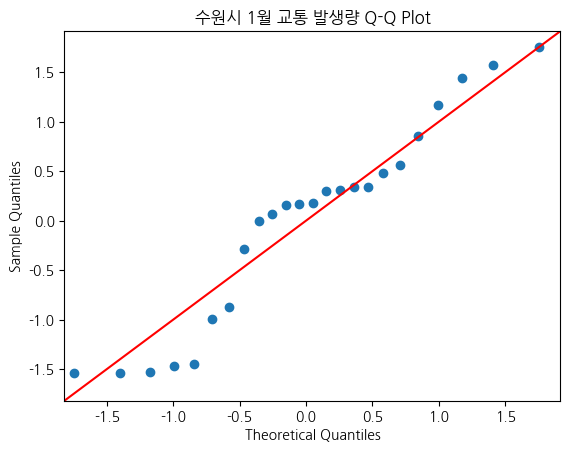

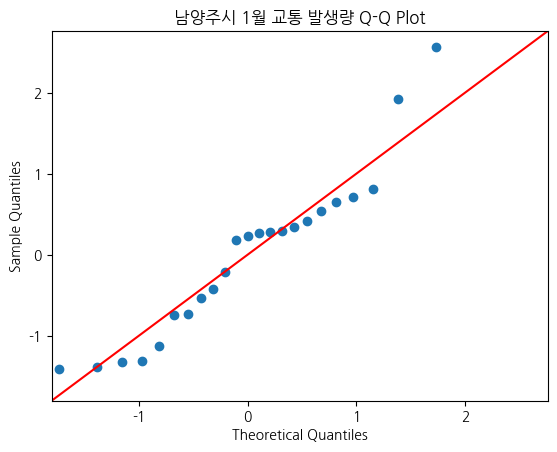

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Q-Q plot 그리기
sm.qqplot(np.array(df_suwon_generation), line='45', fit=True)
plt.title('수원시 1월 교통 발생량 Q-Q Plot')

sm.qqplot(np.array(df_namyangju_generation), line='45', fit=True)
plt.title('남양주시 1월 교통 발생량 Q-Q Plot')
plt.show()

In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic19, p_value19 = bartlett(df_suwon_generation, df_namyangju_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic19)
print("P-value:", p_value19)
if p_value19 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 14.586161098355548
P-value: 0.0001338942414907999
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 수원시와 남양주시의 교통 발생량의 평균 차이 비교(1월)

statistic20, p_value20 = ttest_ind(df_suwon_generation, df_namyangju_generation, equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic20)
print("P-value:", p_value20)
if p_value20 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 4.181580338428244
P-value: 0.00021807349915562295
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 발생량의 중앙값 차이 비교(1월)

from scipy.stats import mannwhitneyu

statistic128, p_value128 = mannwhitneyu(df_suwon_generation, df_namyangju_generation)

print("Mann-Whitney U Statistic:", statistic128)
print("P-value:", p_value128)

if p_value128 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 417.0
P-value: 0.0027894222766906497
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


**교통 도착량 비교(1월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic73, p_value73 = shapiro(df_suwon_arrival)
statistic74, p_value74 = shapiro(df_namyangju_arrival)

print("Shapiro-Wilk 검정 결과 for 수원시 1월 교통 도착량:")
print("Statistic:", statistic73)
print("P-value:", p_value73)
if p_value73 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 1월 교통 도착량:")
print("Statistic:", statistic74)
print("P-value:", p_value74)
if p_value74 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 1월 교통 도착량:
Statistic: 0.9431037306785583
P-value: 0.1912229210138321
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 1월 교통 도착량:
Statistic: 0.9517678022384644
P-value: 0.3182793855667114
데이터는 정규 분포를 따릅니다.


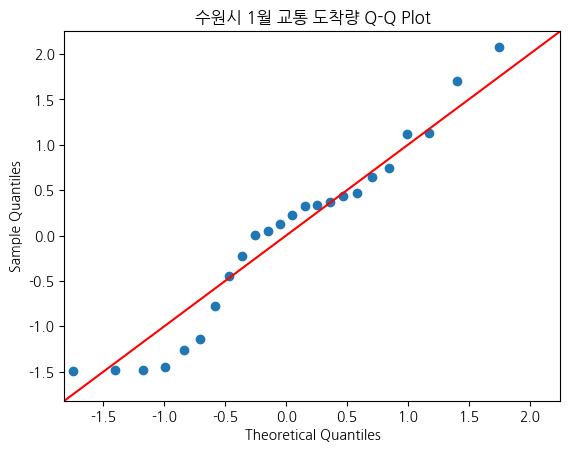

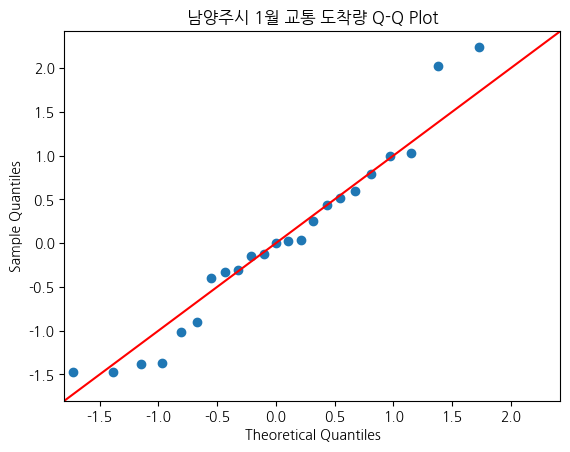

In [ ]:
# Q-Q plot 그리기
sm.qqplot(np.array(df_suwon_arrival), line='45', fit=True)
plt.title('수원시 1월 교통 도착량 Q-Q Plot')

sm.qqplot(np.array(df_namyangju_arrival), line='45', fit=True)
plt.title('남양주시 1월 교통 도착량 Q-Q Plot')
plt.show()

In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic75, p_value75 = bartlett(df_suwon_arrival, df_namyangju_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic75)
print("P-value:", p_value75)
if p_value75 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 17.950278185227475
P-value: 2.267512764866414e-05
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 수원시와 남양주시의 교통 도착량의 평균 차이 비교(1월)

statistic76, p_value76 = ttest_ind(df_suwon_arrival, df_namyangju_arrival, equal_var=False)     #alternative로 단측검정 해보기

print("Welch's t-test 결과:")
print("T-statistic:", statistic76)
print("P-value:", p_value76)
if p_value76 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 4.156967612571518
P-value: 0.00025161436225617785
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 도착량의 중앙값 차이 비교(1월)

statistic129, p_value129 = mannwhitneyu(df_suwon_arrival, df_namyangju_arrival)

print("Mann-Whitney U Statistic:", statistic129)
print("P-value:", p_value129)

if p_value129 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 418.0
P-value: 0.0026011458960534008
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


#### 4월

**교통 발생량 비교(4월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic77, p_value77 = shapiro(df_suwon4_generation)
statistic78, p_value78 = shapiro(df_namyangju4_generation)

print("Shapiro-Wilk 검정 결과 for 수원시 4월 교통 발생량:")
print("Statistic:", statistic77)
print("P-value:", p_value77)
if p_value77 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 4월 교통 발생량:")
print("Statistic:", statistic78)
print("P-value:", p_value78)
if p_value78 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 4월 교통 발생량:
Statistic: 0.923538088798523
P-value: 0.0699663832783699
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 4월 교통 발생량:
Statistic: 0.9202001094818115
P-value: 0.05900674685835838
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic79, p_value79 = bartlett(df_suwon4_generation, df_namyangju4_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic79)
print("P-value:", p_value79)
if p_value79 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 14.33194577161338
P-value: 0.00015324220457147848
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 수원시와 남양주시의 교통 발생량의 평균 차이 비교(4월)

statistic80, p_value80 = ttest_ind(df_suwon4_generation, df_namyangju4_generation, equal_var=False) #alternative로 단측검정

print("Welch's t-test 결과:")
print("T-statistic:", statistic80)
print("P-value:", p_value80)
if p_value80 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 4.285272664410058
P-value: 0.00016203298850300162
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 발생량의 중앙값 차이 비교(11월)

statistic146, p_value146 = mannwhitneyu(df_suwon4_generation, df_namyangju4_generation)

print("Mann-Whitney U Statistic:", statistic146)
print("P-value:", p_value146)

if p_value146 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 443.0
P-value: 0.0014438613414250558
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


**교통 도착량 비교(4월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic81, p_value81 = shapiro(df_suwon4_arrival)
statistic82, p_value82 = shapiro(df_namyangju4_arrival)

print("Shapiro-Wilk 검정 결과 for 수원시 4월 교통 도착량:")
print("Statistic:", statistic81)
print("P-value:", p_value81)
if p_value81 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 4월 교통 도착량:")
print("Statistic:", statistic82)
print("P-value:", p_value82)
if p_value82 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 4월 교통 도착량:
Statistic: 0.9396905303001404
P-value: 0.16055308282375336
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 4월 교통 도착량:
Statistic: 0.9448269605636597
P-value: 0.20877157151699066
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic83, p_value83 = bartlett(df_suwon4_arrival, df_namyangju4_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic83)
print("P-value:", p_value83)
if p_value83 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 18.20493542451624
P-value: 1.9836413495868264e-05
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 수원시와 남양주시의 교통 도착량의 평균 차이 비교(1월)

statistic84, p_value84 = ttest_ind(df_suwon4_arrival, df_namyangju4_arrival, equal_var=False)     #alternative로 단측검정 해보기

print("Welch's t-test 결과:")
print("T-statistic:", statistic84)
print("P-value:", p_value84)
if p_value84 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 4.312682715041518
P-value: 0.0001644450081397231
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 도착량의 중앙값 차이 비교(4월)

statistic147, p_value147 = mannwhitneyu(df_suwon4_arrival, df_namyangju4_arrival)

print("Mann-Whitney U Statistic:", statistic147)
print("P-value:", p_value147)

if p_value147 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 445.0
P-value: 0.0012510612291407744
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


#### 7월

**교통 발생량 비교(7월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic85, p_value85 = shapiro(df_suwon7_generation)
statistic86, p_value86 = shapiro(df_namyangju7_generation)

print("Shapiro-Wilk 검정 결과 for 수원시 7월 교통 발생량:")
print("Statistic:", statistic85)
print("P-value:", p_value85)
if p_value85 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 7월 교통 발생량:")
print("Statistic:", statistic86)
print("P-value:", p_value86)
if p_value86 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 7월 교통 발생량:
Statistic: 0.923502504825592
P-value: 0.06983903050422668
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 7월 교통 발생량:
Statistic: 0.9288751482963562
P-value: 0.10341496020555496
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic87, p_value87 = bartlett(df_suwon7_generation, df_namyangju7_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic87)
print("P-value:", p_value87)
if p_value87 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 14.124388434190674
P-value: 0.00017111084867963263
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 수원시와 남양주시의 교통 발생량의 평균 차이 비교(7월)

statistic88, p_value88 = ttest_ind(df_suwon7_generation, df_namyangju7_generation, equal_var=False) #alternative로 단측검정

print("Welch's t-test 결과:")
print("T-statistic:", statistic88)
print("P-value:", p_value88)
if p_value88 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 4.171612951532367
P-value: 0.0002217548426680444
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 발생량의 중앙값 차이 비교(7월)

statistic148, p_value148 = mannwhitneyu(df_suwon7_generation, df_namyangju7_generation)

print("Mann-Whitney U Statistic:", statistic148)
print("P-value:", p_value148)

if p_value148 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 423.0
P-value: 0.0018225150886152096
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


**교통 도착량 비교(7월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic89, p_value89 = shapiro(df_suwon7_arrival)
statistic90, p_value90 = shapiro(df_namyangju7_arrival)

print("Shapiro-Wilk 검정 결과 for 수원시 7월 교통 도착량:")
print("Statistic:", statistic89)
print("P-value:", p_value89)
if p_value89 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 7월 교통 도착량:")
print("Statistic:", statistic90)
print("P-value:", p_value90)
if p_value90 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 7월 교통 도착량:
Statistic: 0.9403131008148193
P-value: 0.1657666563987732
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 7월 교통 도착량:
Statistic: 0.9504830241203308
P-value: 0.2994542419910431
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic91, p_value91 = bartlett(df_suwon7_arrival, df_namyangju7_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic91)
print("P-value:", p_value91)
if p_value91 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 18.189599758928416
P-value: 1.9996783944777383e-05
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 수원시와 남양주시의 교통 도착량의 평균 차이 비교(7월)

statistic92, p_value92 = ttest_ind(df_suwon7_arrival, df_namyangju7_arrival, equal_var=False)     #alternative로 단측검정 해보기

print("Welch's t-test 결과:")
print("T-statistic:", statistic92)
print("P-value:", p_value92)
if p_value92 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 4.186780949983526
P-value: 0.00023287426304918887
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 도착량의 중앙값 차이 비교(4월)

statistic149, p_value149 = mannwhitneyu(df_suwon7_arrival, df_namyangju7_arrival)

print("Mann-Whitney U Statistic:", statistic149)
print("P-value:", p_value149)

if p_value149 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 422.0
P-value: 0.0019585577531220544
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


#### 11월

**교통 발생량 비교(11월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic93, p_value93 = shapiro(df_suwon11_generation)
statistic94, p_value94 = shapiro(df_namyangju11_generation)

print("Shapiro-Wilk 검정 결과 for 수원시 11월 교통 발생량:")
print("Statistic:", statistic93)
print("P-value:", p_value93)
if p_value93 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 11월 교통 발생량:")
print("Statistic:", statistic94)
print("P-value:", p_value94)
if p_value94 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 11월 교통 발생량:
Statistic: 0.9323986768722534
P-value: 0.11030395328998566
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 11월 교통 발생량:
Statistic: 0.9131324887275696
P-value: 0.041264452040195465
데이터는 정규 분포를 따르지 않습니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 발생량의 중앙값 차이 비교(11월)

statistic95, p_value95 = mannwhitneyu(df_suwon11_generation, df_namyangju11_generation)

print("Mann-Whitney U Statistic:", statistic95)
print("P-value:", p_value95)

if p_value95 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 445.0
P-value: 0.0012510612291407744
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


**교통 도착량 비교(11월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic96, p_value96 = shapiro(df_suwon11_arrival)
statistic97, p_value97 = shapiro(df_namyangju11_arrival)

print("Shapiro-Wilk 검정 결과 for 수원시 11월 교통 도착량:")
print("Statistic:", statistic96)
print("P-value:", p_value96)
if p_value96 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 11월 교통 도착량:")
print("Statistic:", statistic97)
print("P-value:", p_value97)
if p_value97 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 11월 교통 도착량:
Statistic: 0.9442753791809082
P-value: 0.20299451053142548
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 11월 교통 도착량:
Statistic: 0.9417665600776672
P-value: 0.17858684062957764
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic98, p_value98 = bartlett(df_suwon11_arrival, df_namyangju11_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic98)
print("P-value:", p_value98)
if p_value98 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 18.130189268968447
P-value: 2.0630454344551867e-05
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 수원시와 남양주시의 교통 도착량의 평균 차이 비교(7월)

statistic99, p_value99 = ttest_ind(df_suwon11_arrival, df_namyangju11_arrival, equal_var=False)     #alternative로 단측검정 해보기

print("Welch's t-test 결과:")
print("T-statistic:", statistic99)
print("P-value:", p_value99)
if p_value99 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: 4.243987157175134
P-value: 0.00019857846761444202
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 용인시와 고양시의 교통 도착량의 중앙값 차이 비교(7월)

statistic150, p_value150 = mannwhitneyu(df_suwon11_arrival, df_namyangju11_arrival)

print("Mann-Whitney U Statistic:", statistic150)
print("P-value:", p_value150)

if p_value150 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 446.0
P-value: 0.0011638469577302437
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


### 수원시 vs 고양시

#### 1월

**교통 발생량 비교(1월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic21, p_value21 = shapiro(df_suwon_generation)
statistic22, p_value22 = shapiro(df_goyang_generation)

print("Shapiro-Wilk 검정 결과 for 수원시 1월 교통 발생량:")
print("Statistic:", statistic21)
print("P-value:", p_value21)
if p_value21 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 1월 교통 발생량:")
print("Statistic:", statistic22)
print("P-value:", p_value22)
if p_value22 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 1월 교통 발생량:
Statistic: 0.9210414290428162
P-value: 0.061590760946273804
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 1월 교통 발생량:
Statistic: 0.9359981417655945
P-value: 0.13277912139892578
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic23, p_value23 = bartlett(df_suwon_generation, df_goyang_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic23)
print("P-value:", p_value23)
if p_value23 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.35444784728592144
P-value: 0.5516060464646926
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 수원시와 고양시의 교통 발생량의 평균 차이 비교(1월)

statistic24, p_value24 = ttest_ind(df_suwon_generation, df_goyang_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic24)
print("P-value:", p_value24)
if p_value24 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 1.0316354813309498
P-value: 0.3076366511409417
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 남양주시의 교통 발생량의 중앙값 차이 비교(1월)

statistic151, p_value151 = mannwhitneyu(df_suwon_generation, df_goyang_generation)

print("Mann-Whitney U Statistic:", statistic151)
print("P-value:", p_value151)

if p_value151 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 353.0
P-value: 0.18352895180974704
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**교통 도착량 비교(1월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic100, p_value100 = shapiro(df_suwon_arrival)
statistic101, p_value101 = shapiro(df_goyang_arrival)

print("Shapiro-Wilk 검정 결과 for 수원시 1월 교통 도착량:")
print("Statistic:", statistic100)
print("P-value:", p_value100)
if p_value100 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 1월 교통 도착량:")
print("Statistic:", statistic101)
print("P-value:", p_value101)
if p_value101 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 1월 교통 도착량:
Statistic: 0.9431037306785583
P-value: 0.1912229210138321
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 1월 교통 도착량:
Statistic: 0.9424625039100647
P-value: 0.18505989015102386
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic102, p_value102 = bartlett(df_suwon_arrival, df_goyang_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic102)
print("P-value:", p_value102)
if p_value102 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.6812968998220601
P-value: 0.40914049879742975
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 수원시와 고양시의 교통 도착량의 평균 차이 비교(11월)

statistic103, p_value103 = ttest_ind(df_suwon_generation, df_goyang_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic103)
print("P-value:", p_value103)
if p_value103 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 1.0316354813309498
P-value: 0.3076366511409417
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 고양시의 교통 도착량의 중앙값 차이 비교(1월)

statistic152, p_value152 = mannwhitneyu(df_suwon_arrival, df_goyang_arrival)

print("Mann-Whitney U Statistic:", statistic152)
print("P-value:", p_value152)

if p_value152 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 348.0
P-value: 0.21987171062870314
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


#### 4월

**교통 발생량 비교(4월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic104, p_value104 = shapiro(df_suwon4_generation)
statistic105, p_value105 = shapiro(df_goyang4_generation)

print("Shapiro-Wilk 검정 결과 for 수원시 4월 교통 발생량:")
print("Statistic:", statistic104)
print("P-value:", p_value104)
if p_value104 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 4월 교통 발생량:")
print("Statistic:", statistic105)
print("P-value:", p_value105)
if p_value105 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 4월 교통 발생량:
Statistic: 0.923538088798523
P-value: 0.0699663832783699
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 4월 교통 발생량:
Statistic: 0.9303561449050903
P-value: 0.09929016977548599
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic106, p_value106 = bartlett(df_suwon4_generation, df_goyang4_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic106)
print("P-value:", p_value106)
if p_value106 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.4446126555603091
P-value: 0.5049044840496826
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 수원시와 고양시의 교통 발생량의 평균 차이 비교(1월)

statistic107, p_value107 = ttest_ind(df_suwon4_generation, df_goyang4_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic107)
print("P-value:", p_value107)
if p_value107 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 1.1543957877269775
P-value: 0.25430011406945385
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 용인시의 교통 발생량의 중앙값 차이 비교(4월)

statistic153, p_value153 = mannwhitneyu(df_suwon4_generation, df_goyang4_generation)

print("Mann-Whitney U Statistic:", statistic153)
print("P-value:", p_value153)

if p_value153 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 359.0
P-value: 0.1460335202810438
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**교통 도착량 비교(4월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic108, p_value108 = shapiro(df_suwon4_arrival)
statistic109, p_value109 = shapiro(df_goyang4_arrival)

print("Shapiro-Wilk 검정 결과 for 수원시 4월 교통 도착량:")
print("Statistic:", statistic108)
print("P-value:", p_value108)
if p_value108 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 4월 교통 도착량:")
print("Statistic:", statistic109)
print("P-value:", p_value109)
if p_value109 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 4월 교통 도착량:
Statistic: 0.9396905303001404
P-value: 0.16055308282375336
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 4월 교통 도착량:
Statistic: 0.9450330138206482
P-value: 0.21096967160701752
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic110, p_value110 = bartlett(df_suwon4_generation, df_goyang4_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic110)
print("P-value:", p_value110)
if p_value110 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.4446126555603091
P-value: 0.5049044840496826
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 수원시와 고양시의 교통 도착량의 평균 차이 비교(4월)

statistic111, p_value111 = ttest_ind(df_suwon4_generation, df_goyang4_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic111)
print("P-value:", p_value111)
if p_value111 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 1.1543957877269775
P-value: 0.25430011406945385
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 고양시의 교통 도착량의 중앙값 차이 비교(4월)

statistic154, p_value154 = mannwhitneyu(df_suwon4_arrival, df_goyang4_arrival)

print("Mann-Whitney U Statistic:", statistic154)
print("P-value:", p_value154)

if p_value154 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 353.0
P-value: 0.18352895180974704
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


#### 7월

**교통 발생량 비교(7월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic112, p_value112 = shapiro(df_suwon7_generation)
statistic113, p_value113 = shapiro(df_goyang7_generation)

print("Shapiro-Wilk 검정 결과 for 수원시 7월 교통 발생량:")
print("Statistic:", statistic112)
print("P-value:", p_value112)
if p_value112 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 7월 교통 발생량:")
print("Statistic:", statistic113)
print("P-value:", p_value113)
if p_value113 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 7월 교통 발생량:
Statistic: 0.923502504825592
P-value: 0.06983903050422668
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 7월 교통 발생량:
Statistic: 0.933864414691925
P-value: 0.11895711719989777
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic114, p_value114 = bartlett(df_suwon7_generation, df_goyang7_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic114)
print("P-value:", p_value114)
if p_value114 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.24883869239461767
P-value: 0.6178939793810808
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 수원시와 고양시의 교통 발생량의 평균 차이 비교(7월)

statistic115, p_value115 = ttest_ind(df_suwon7_generation, df_goyang7_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic115)
print("P-value:", p_value115)
if p_value115 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 0.9545755471586601
P-value: 0.3447820791808238
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 용인시의 교통 발생량의 중앙값 차이 비교(7월)

statistic155, p_value155 = mannwhitneyu(df_suwon7_generation, df_goyang7_generation)

print("Mann-Whitney U Statistic:", statistic155)
print("P-value:", p_value155)

if p_value155 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 354.0
P-value: 0.17682769153006928
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**교통 도착량 비교(7월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic116, p_value116 = shapiro(df_suwon7_arrival)
statistic117, p_value117 = shapiro(df_goyang7_arrival)

print("Shapiro-Wilk 검정 결과 for 수원시 7월 교통 도착량:")
print("Statistic:", statistic116)
print("P-value:", p_value116)
if p_value116 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 7월 교통 도착량:")
print("Statistic:", statistic117)
print("P-value:", p_value117)
if p_value117 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 7월 교통 도착량:
Statistic: 0.9403131008148193
P-value: 0.1657666563987732
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 7월 교통 도착량:
Statistic: 0.9447799921035767
P-value: 0.20827430486679077
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic118, p_value118 = bartlett(df_suwon7_arrival, df_goyang7_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic118)
print("P-value:", p_value118)
if p_value118 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.6314570697490551
P-value: 0.42682135439604396
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 수원시와 고양시의 교통 도착량의 평균 차이 비교(7월)

statistic119, p_value119 = ttest_ind(df_suwon7_arrival, df_goyang7_arrival)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic119)
print("P-value:", p_value119)
if p_value119 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 1.004203331863636
P-value: 0.32053402370668244
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 고양시의 교통 도착량의 중앙값 차이 비교(7월)

statistic156, p_value156 = mannwhitneyu(df_suwon7_arrival, df_goyang7_arrival)

print("Mann-Whitney U Statistic:", statistic156)
print("P-value:", p_value156)

if p_value156 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 347.0
P-value: 0.22772123760157525
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


#### 11월

**교통 발생량 비교(11월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic120, p_value120 = shapiro(df_suwon11_generation)
statistic121, p_value121 = shapiro(df_goyang11_generation)

print("Shapiro-Wilk 검정 결과 for 수원시 11월 교통 발생량:")
print("Statistic:", statistic120)
print("P-value:", p_value120)
if p_value120 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 11월 교통 발생량:")
print("Statistic:", statistic121)
print("P-value:", p_value121)
if p_value121 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 11월 교통 발생량:
Statistic: 0.9323986768722534
P-value: 0.11030395328998566
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 11월 교통 발생량:
Statistic: 0.9271711111068726
P-value: 0.08428937941789627
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic122, p_value122 = bartlett(df_suwon11_generation, df_goyang11_generation)

print("Bartlett 검정 결과:")
print("Statistic:", statistic122)
print("P-value:", p_value122)
if p_value122 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.314091384728562
P-value: 0.5751803331959517
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 수원시와 고양시의 교통 발생량의 평균 차이 비교(1월)

statistic123, p_value123 = ttest_ind(df_suwon11_generation, df_goyang11_generation)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic123)
print("P-value:", p_value123)
if p_value123 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 1.086595655955045
P-value: 0.2828767870200714
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 용인시의 교통 발생량의 중앙값 차이 비교(11월)

statistic157, p_value157 = mannwhitneyu(df_suwon11_generation, df_goyang11_generation)

print("Mann-Whitney U Statistic:", statistic157)
print("P-value:", p_value157)

if p_value157 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 354.0
P-value: 0.17682769153006928
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**교통 도착량 비교(11월)**

In [ ]:
### Shapiro-Wilk 검정으로 정규정 확인

statistic124, p_value124 = shapiro(df_suwon11_arrival)
statistic125, p_value125 = shapiro(df_goyang11_arrival)

print("Shapiro-Wilk 검정 결과 for 수원시 11월 교통 도착량:")
print("Statistic:", statistic124)
print("P-value:", p_value124)
if p_value124 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 고양시 11월 교통 도착량:")
print("Statistic:", statistic125)
print("P-value:", p_value125)
if p_value125 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 수원시 11월 교통 도착량:
Statistic: 0.9442753791809082
P-value: 0.20299451053142548
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 고양시 11월 교통 도착량:
Statistic: 0.9469892978668213
P-value: 0.23294873535633087
데이터는 정규 분포를 따릅니다.


In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic126, p_value126 = bartlett(df_suwon11_arrival, df_goyang11_arrival)

print("Bartlett 검정 결과:")
print("Statistic:", statistic126)
print("P-value:", p_value126)
if p_value126 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.849357092889622
P-value: 0.35673427669477975
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 수원시와 고양시의 교통 도착량의 평균 차이 비교(7월)

statistic127, p_value127 = ttest_ind(df_suwon11_arrival, df_goyang11_arrival)

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic127)
print("P-value:", p_value127)
if p_value127 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: 1.1366787382922405
P-value: 0.2615595279696543
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 수원시와 고양시의 교통 도착량의 중앙값 차이 비교(11월)

statistic158, p_value158 = mannwhitneyu(df_suwon11_arrival, df_goyang11_arrival)

print("Mann-Whitney U Statistic:", statistic158)
print("P-value:", p_value158)

if p_value158 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 347.0
P-value: 0.22772123760157525
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


## testing(혼잡도)

### 고양

In [ ]:
import glob
import numpy as np
import pandas as pd

month_list=['1월','5월','7월','11월']
df_bus_goyang = pd.DataFrame()
for i in month_list:
  bus = '고양_{}'.format(i)
  filepath = '/content/drive/MyDrive/DSL/24-1/EDA Project/혼잡도/고양_혼잡도/{}/'.format(i)
  file_count = len(glob.glob(filepath + '/*'))

  for j in range(1,file_count+1):
    filename = bus+'_{}.csv'.format(j)
    df = pd.read_csv(filepath+filename,encoding='cp949')
    df = df.drop(['기종점','정류장순번','Unnamed: 28'],axis=1)
    df['월'] = '{}'.format(i)
    df= df.reindex(['월', '노선', '정류장명', '04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시','12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시','22시', '23시', '00시', '01시', '02시', '03시'], axis = 1)

    df_bus_goyang = pd.concat([df_bus_goyang, df],ignore_index=True)
df_bus_goyang.head()

,월,노선,정류장명,04시,05시,06시,07시,08시,09시,10시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,1월,1000,대화동,5,2,7,7,5,2,5,...,2,2,0,0,2,0,0,0,0,0
1,1월,1000,대화7단지사거리(경유),5,2,7,7,5,2,5,...,2,2,0,0,2,0,0,0,0,0
2,1월,1000,현대파크아파트.양우아파트,7,12,29,20,27,7,7,...,4,5,5,2,2,0,0,0,0,0
3,1월,1000,송포파출소.송포농협,7,17,45,40,49,19,10,...,13,5,5,5,5,0,0,0,0,0
4,1월,1000,대화역,5,10,21,26,47,19,19,...,20,2,7,12,7,0,0,0,0,0


In [ ]:
df_bus_goyang_출근 = df_bus_goyang[['월', '노선', '정류장명','06시','07시','08시','09시']]
df_bus_goyang_퇴근 = df_bus_goyang[['월', '노선', '정류장명','17시', '18시', '19시']]
df_bus_goyang_출근['평균혼잡도'] = np.round(df_bus_goyang_출근.mean(axis=1),1)
df_bus_goyang_퇴근['평균혼잡도'] = np.round(df_bus_goyang_퇴근.mean(axis=1),1)

<ipython-input-74-5d0472d75e51>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bus_goyang_출근['평균혼잡도'] = np.round(df_bus_goyang_출근.mean(axis=1),1)
<ipython-input-74-5d0472d75e51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_goyang_출근['평균혼잡도'] = np.round(df_bus_goyang_출근.mean(axis=1),1)
<ipython-input-74-5d0472d75e51>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bus_goyang_퇴근['평균혼잡도'] = np.ro

In [ ]:
bus_list = pd.DataFrame(df_bus_goyang_출근.value_counts('노선').index)
results_goyang_출근 = []

for i in bus_list['노선']:
  df_bus_goyang_출근_1 = df_bus_goyang_출근[df_bus_goyang_출근['노선']=='{}'.format(i)]
  means = np.mean(df_bus_goyang_출근_1['평균혼잡도'])*2
  results_goyang_출근.append(means)
results_goyang_출근 = pd.DataFrame(results_goyang_출근)
results_goyang_출근.index= df_bus_goyang_출근.value_counts('노선').index
results_goyang_출근 = results_goyang_출근.reset_index()
results_goyang_출근.columns = ['노선','혼잡도']
results_goyang_출근.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
노선,200,9701,1001,1082,1500,9600,9711,1100,9707,9700,1200,1900,M7412,1000,9714,M7731,M7119
혼잡도,23.036117,51.842609,53.021198,57.162654,77.120909,17.196587,84.275256,15.234994,38.678438,25.974174,84.010108,17.713045,63.391749,93.714407,47.472771,87.17642,62.856395


In [ ]:
bus_list = pd.DataFrame(df_bus_goyang_퇴근.value_counts('노선').index)
results_goyang_퇴근 = []

for i in bus_list['노선']:
  df_bus_goyang_퇴근_1 = df_bus_goyang_퇴근[df_bus_goyang_퇴근['노선']=='{}'.format(i)]
  means = np.mean(df_bus_goyang_퇴근_1['평균혼잡도'])*2
  results_goyang_퇴근.append(means)
results_goyang_퇴근 = pd.DataFrame(results_goyang_퇴근)
results_goyang_퇴근.index= df_bus_goyang_퇴근.value_counts('노선').index
results_goyang_퇴근 = results_goyang_퇴근.reset_index()
results_goyang_퇴근.columns = ['노선','혼잡도']
results_goyang_퇴근.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
노선,200,9701,1001,1082,1500,9600,9711,1100,9707,9700,1200,1900,M7412,1000,9714,M7731,M7119
혼잡도,39.831752,54.78452,54.034579,76.659091,96.860096,11.336728,82.819886,6.613957,49.083625,22.052479,89.603319,5.995828,73.159702,105.779586,41.190428,126.684612,74.066966


### 남양주

In [ ]:
month_list=['1월','5월','7월','11월']
df_bus_namyangju = pd.DataFrame()
for i in month_list:
  bus = '남양주_{}'.format(i)
  filepath = '/content/drive/MyDrive/DSL/24-1/EDA Project/혼잡도/남양주_혼잡도/{}/'.format(i)
  file_count = len(glob.glob(filepath + '/*'))

  for j in range(1,file_count+1):
    filename = bus+'_{}.csv'.format(j)
    df = pd.read_csv(filepath+filename,encoding='cp949')
    df = df.drop(['기종점','정류장순번','Unnamed: 28'],axis=1)
    df['월'] = '{}'.format(i)
    df= df.reindex(['월', '노선', '정류장명', '04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시','12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시','22시', '23시', '00시', '01시', '02시', '03시'], axis = 1)

    df_bus_namyangju = pd.concat([df_bus_namyangju, df],ignore_index=True)
df_bus_namyangju.head()

,월,노선,정류장명,04시,05시,06시,07시,08시,09시,10시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,1월,100,진벌리차고지(경유),0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1월,100,진벌리차고지,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
2,1월,100,진광전원교회,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
3,1월,100,경복대,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
4,1월,100,주리골,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [ ]:
df_bus_namyangju_출근 = df_bus_namyangju[['월', '노선', '정류장명','06시','07시', '08시', '09시']]
df_bus_namyangju_퇴근 = df_bus_namyangju[['월', '노선', '정류장명','17시', '18시', '19시']]
df_bus_namyangju_출근['평균혼잡도'] = np.round(df_bus_namyangju_출근.mean(axis=1),1)
df_bus_namyangju_퇴근['평균혼잡도'] = np.round(df_bus_namyangju_퇴근.mean(axis=1),1)

<ipython-input-78-a54e57627c53>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bus_namyangju_출근['평균혼잡도'] = np.round(df_bus_namyangju_출근.mean(axis=1),1)
<ipython-input-78-a54e57627c53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_namyangju_출근['평균혼잡도'] = np.round(df_bus_namyangju_출근.mean(axis=1),1)
<ipython-input-78-a54e57627c53>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bus_namyangju_퇴근['

In [ ]:
bus_list = pd.DataFrame(df_bus_namyangju_출근.value_counts('노선').index)
results_namyangju_출근 = []

for i in bus_list['노선']:
  df_bus_namyangju_출근_1 = df_bus_namyangju_출근[df_bus_namyangju_출근['노선']=='{}'.format(i)]
  means = np.mean(df_bus_namyangju_출근_1['평균혼잡도'])*2
  results_namyangju_출근.append(means)
results_namyangju_출근 = pd.DataFrame(results_namyangju_출근)
results_namyangju_출근.index= df_bus_namyangju_출근.value_counts('노선').index
results_namyangju_출근 = results_namyangju_출근.reset_index()
results_namyangju_출근.columns = ['노선','혼잡도']
results_namyangju_출근.T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
노선,1330-3,1330-44,1330-2,2000,1100,11,100,7007,7000,1200,...,7001,G9311,8002,G6100,M2323,M2316,M2352,M2341,M2344,M2353
혼잡도,6.765297,14.735461,11.455204,25.399621,23.424746,9.43622,19.55869,33.290059,3.686275,24.039862,...,30.846849,17.347781,70.127407,59.050203,85.867644,82.061425,81.698636,50.470455,40.282507,67.349927


In [ ]:
bus_list = pd.DataFrame(df_bus_namyangju_출근.value_counts('노선').index)
results_namyangju_퇴근 = []

for i in bus_list['노선']:
  df_bus_namyangju_퇴근_1 = df_bus_namyangju_퇴근[df_bus_namyangju_퇴근['노선']=='{}'.format(i)]
  means = np.mean(df_bus_namyangju_퇴근_1['평균혼잡도'])*2
  results_namyangju_퇴근.append(means)
results_namyangju_퇴근 = pd.DataFrame(results_namyangju_퇴근)
results_namyangju_퇴근.index= df_bus_namyangju_퇴근.value_counts('노선').index
results_namyangju_퇴근 = results_namyangju_퇴근.reset_index()
results_namyangju_퇴근.columns = ['노선','혼잡도']
results_namyangju_퇴근.T

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
노선,1330-3,1330-44,1330-2,2000,1100,11,100,7007,7000,1200,...,7001,G9311,8002,G6100,M2323,M2316,M2352,M2341,M2344,M2353
혼잡도,1.369977,13.462404,13.306495,32.517803,19.066306,13.939907,31.055367,38.663854,4.856796,34.733757,...,32.079494,14.200649,73.80837,56.129866,90.438158,78.301597,86.491623,60.971832,46.158264,70.159531


### 수원

In [ ]:
month_list=['1월','5월','7월','11월']
df_bus_suwon = pd.DataFrame()
for i in month_list:
  bus = '수원_{}'.format(i)
  filepath = '/content/drive/MyDrive/DSL/24-1/EDA Project/혼잡도/수원_혼잡도/{}/'.format(i)
  file_count = len(glob.glob(filepath + '/*'))

  for j in range(1,file_count+1):
    filename = bus+'_{}.csv'.format(j)
    df = pd.read_csv(filepath+filename,encoding='cp949')
    df = df.drop(['기종점','정류장순번','Unnamed: 28'],axis=1)
    df['월'] = '{}'.format(i)
    df= df.reindex(['월', '노선', '정류장명', '04시', '05시', '06시', '07시', '08시', '09시', '10시', '11시','12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시', '20시', '21시','22시', '23시', '00시', '01시', '02시', '03시'], axis = 1)

    df_bus_suwon = pd.concat([df_bus_suwon, df],ignore_index=True)
df_bus_suwon.head()

,월,노선,정류장명,04시,05시,06시,07시,08시,09시,10시,...,18시,19시,20시,21시,22시,23시,00시,01시,02시,03시
0,1월,1007-1,대광빌리지,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1월,1007-1,무궁화전자,0,2,4,0,7,0,0,...,4,0,0,0,0,0,0,0,0,0
2,1월,1007-1,원천삼성아파트,0,0,0,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1월,1007-1,원일초교,0,5,0,7,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,1월,1007-1,원천레이크파크아파트,0,0,0,11,10,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_bus_suwon_출근 = df_bus_suwon[['월', '노선', '정류장명','06시','07시', '08시', '09시']]
df_bus_suwon_퇴근 = df_bus_suwon[['월', '노선', '정류장명','17시', '18시', '19시']]
df_bus_suwon_출근['평균혼잡도'] = np.round(df_bus_suwon_출근.mean(axis=1),1)
df_bus_suwon_퇴근['평균혼잡도'] = np.round(df_bus_suwon_퇴근.mean(axis=1),1)

<ipython-input-82-c61f8757e861>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bus_suwon_출근['평균혼잡도'] = np.round(df_bus_suwon_출근.mean(axis=1),1)
<ipython-input-82-c61f8757e861>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_suwon_출근['평균혼잡도'] = np.round(df_bus_suwon_출근.mean(axis=1),1)
<ipython-input-82-c61f8757e861>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bus_suwon_퇴근['평균혼잡도'] = np.round(d

In [ ]:
bus_list = pd.DataFrame(df_bus_suwon_출근.value_counts('노선').index)
results_suwon_출근 = []

for i in bus_list['노선']:
  df_bus_suwon_출근_1 = df_bus_suwon_출근[df_bus_suwon_출근['노선']=='{}'.format(i)]
  means = np.mean(df_bus_suwon_출근_1['평균혼잡도'])*2
  results_suwon_출근.append(means)
results_suwon_출근 = pd.DataFrame(results_suwon_출근)
results_suwon_출근.index= df_bus_suwon_출근.value_counts('노선').index
results_suwon_출근 = results_suwon_출근.reset_index()
results_suwon_출근.columns = ['노선','혼잡도']
results_suwon_출근.T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
노선,1007-1,7800,7002,3003,7000,3000,3002,7780,3007,7001,...,8800,7770,3008,M5107,5100,M5121,M5115,M5443,M5422,G5100
혼잡도,29.635217,62.772516,25.498373,54.04571,66.317992,65.459487,40.824646,61.593939,73.085183,70.530282,...,94.808678,88.627047,26.955789,98.377547,82.489823,80.96668,37.809132,39.711376,27.567407,41.865423


In [ ]:
bus_list = pd.DataFrame(df_bus_suwon_퇴근.value_counts('노선').index)
results_suwon_퇴근 = []

for i in bus_list['노선']:
  df_bus_suwon_퇴근_1 = df_bus_suwon_퇴근[df_bus_suwon_퇴근['노선']=='{}'.format(i)]
  means = np.mean(df_bus_suwon_퇴근_1['평균혼잡도'])*2
  results_suwon_퇴근.append(means)
results_suwon_퇴근 = pd.DataFrame(results_suwon_퇴근)
results_suwon_퇴근.index= df_bus_suwon_퇴근.value_counts('노선').index
results_suwon_퇴근 = results_suwon_퇴근.reset_index()
results_suwon_퇴근.columns = ['노선','혼잡도']
results_suwon_퇴근.T

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
노선,1007-1,7800,7002,3003,7000,3000,3002,7780,3007,7001,...,8800,7770,3008,M5107,5100,M5121,M5115,M5443,M5422,G5100
혼잡도,24.278246,68.609021,23.745144,56.768948,80.597294,85.475102,46.839965,62.165213,77.451772,83.260627,...,103.633815,97.230558,28.115773,107.427586,102.754545,93.564326,34.132231,45.823994,33.659515,45.016343


### 용인

In [ ]:
month_list=['1월','5월','7월','11월']
df_bus_yongin = pd.DataFrame()
for i in month_list:
  bus = '용인_{}'.format(i)
  filepath = '/content/drive/MyDrive/DSL/24-1/EDA Project/혼잡도/용인_혼잡도/{}/'.format(i)
  file_count = len(glob.glob(filepath + '/*'))

  for j in range(1,file_count+1):
    filename = bus+'_{}.csv'.format(j)
    df = pd.read_csv(filepath+filename,encoding='cp949')
    df = df.drop(['기종점','정류장순번','Unnamed: 28'],axis=1)
    df['월'] = '{}'.format(i)
    df_출근= df.reindex(['월', '노선', '정류장명', '07시', '08시', '09시','17시', '18시', '19시'], axis = 1)

    df_bus_yongin = pd.concat([df_bus_yongin, df],ignore_index=True)
df_bus_yongin.head()

,노선,정류장명,04시,05시,06시,07시,08시,09시,10시,11시,...,19시,20시,21시,22시,23시,00시,01시,02시,03시,월
0,1005,외국어대학교,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1월
1,1005,외국어대학교(경유),0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1월
2,1005,외국어대학교기숙사,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1월
3,1005,외대.모현빌라,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1월
4,1005,외국어대입구,0,0,0,0,2,0,0,0,...,0,2,0,0,0,0,0,0,0,1월


In [ ]:
df_bus_yongin_출근 = df_bus_yongin[['월', '노선', '정류장명','06시','07시', '08시', '09시']]
df_bus_yongin_퇴근 = df_bus_yongin[['월', '노선', '정류장명','17시', '18시', '19시']]
df_bus_yongin_출근['평균혼잡도'] = np.round(df_bus_yongin_출근.mean(axis=1),1)
df_bus_yongin_퇴근['평균혼잡도'] = np.round(df_bus_yongin_퇴근.mean(axis=1),1)
df_bus_yongin_출근 = df_bus_yongin_출근[['노선','평균혼잡도']]

<ipython-input-86-298767713841>:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bus_yongin_출근['평균혼잡도'] = np.round(df_bus_yongin_출근.mean(axis=1),1)
<ipython-input-86-298767713841>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bus_yongin_출근['평균혼잡도'] = np.round(df_bus_yongin_출근.mean(axis=1),1)
<ipython-input-86-298767713841>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_bus_yongin_퇴근['평균혼잡도'] = np.ro

In [ ]:
bus_list = pd.DataFrame(df_bus_yongin_출근.value_counts('노선').index)
results_yongin_출근 = []

for i in bus_list['노선']:
  df_bus_yongin_출근_1 = df_bus_yongin_출근[df_bus_yongin_출근['노선']=='{}'.format(i)]
  means = np.mean(df_bus_yongin_출근_1['평균혼잡도'])*2
  results_yongin_출근.append(means)
results_yongin_출근 = pd.DataFrame(results_yongin_출근)
results_yongin_출근.index= df_bus_yongin_출근.value_counts('노선').index
results_yongin_출근 = results_yongin_출근.reset_index()
results_yongin_출근.columns = ['노선','혼잡도']
results_yongin_출근 = results_yongin_출근.set_index('노선')
results_yongin_출근.drop(['5000B','5003B','5700B'],axis=0,inplace=True)
results_yongin_출근 = results_yongin_출근.reset_index()
results_yongin_출근.T
# 용인 5000B,5003B,5700B제외

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
노선,1500-2,1005,1113,5700A,6900,5600,1150,1117,7007-1,1241,...,102,5001-1,5003A,1550,1101,5006,1570,8100,M4101,M4455
혼잡도,52.542523,14.696688,25.838671,36.453729,36.733825,52.607014,60.635511,41.878244,40.022809,43.187511,...,58.512526,63.593002,76.141956,39.57468,40.222847,56.041391,34.354965,117.662032,77.677495,73.496023


In [ ]:
bus_list = pd.DataFrame(df_bus_yongin_퇴근.value_counts('노선').index)
results_yongin_퇴근 = []

for i in bus_list['노선']:
  df_bus_yongin_퇴근_1 = df_bus_yongin_퇴근[df_bus_yongin_퇴근['노선']=='{}'.format(i)]
  means = np.mean(df_bus_yongin_퇴근_1['평균혼잡도'])*2
  results_yongin_퇴근.append(means)
results_yongin_퇴근 = pd.DataFrame(results_yongin_퇴근)
results_yongin_퇴근.index= df_bus_yongin_퇴근.value_counts('노선').index
results_yongin_퇴근 = results_yongin_퇴근.reset_index()
results_yongin_퇴근.columns = ['노선','혼잡도']
results_yongin_퇴근 = results_yongin_퇴근.set_index('노선')
results_yongin_퇴근.drop(['5000A','5002A','5003A','5700A'],axis=0,inplace=True)
results_yongin_퇴근 = results_yongin_퇴근.reset_index()
results_yongin_퇴근.T
# 용인 5000A,5002A,5003A,5700A제외

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
노선,1500-2,1005,1113,6900,5700B,5600,1150,1117,5000B,7007-1,...,4101,102,5001-1,1550,1101,5006,1570,8100,M4101,M4455
혼잡도,63.380744,12.635162,22.359126,36.142667,36.964549,65.51933,71.175947,50.417444,66.227117,38.744738,...,60.49391,68.94812,79.0343,40.033707,36.994408,59.936019,36.672762,125.568672,87.759459,75.160852


### 출근(버스)

In [ ]:
### Shapiro-Wilk 검정으로 출근 혼잡도 정규정 확인

statistic_goyang1, p_value_goyang1 = shapiro(results_goyang_출근['혼잡도'])
statistic_namyangju1, p_value_namyangju1 = shapiro(results_namyangju_출근['혼잡도'])
statistic_suwon1, p_value_suwon1 = shapiro(results_suwon_출근['혼잡도'])
statistic_yongin1, p_value_yongin1 = shapiro(results_yongin_출근['혼잡도'])

print("Shapiro-Wilk 검정 결과 for 고양시 출근 혼잡도:")
print("Statistic:", statistic_goyang1)
print("P-value:", p_value_goyang1)
if p_value_goyang1 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 출근 혼잡도:")
print("Statistic:", statistic_namyangju1)
print("P-value:", p_value_namyangju1)
if p_value_namyangju1 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 수원시 출근 혼잡도:")
print("Statistic:", statistic_suwon1)
print("P-value:", p_value_suwon1)
if p_value_suwon1 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 용인시 출근 혼잡도:")
print("Statistic:", statistic_yongin1)
print("P-value:", p_value_yongin1)
if p_value_yongin1 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 고양시 출근 혼잡도:
Statistic: 0.9270521998405457
P-value: 0.194224014878273
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 출근 혼잡도:
Statistic: 0.9091532826423645
P-value: 0.003123972564935684
데이터는 정규 분포를 따르지 않습니다.

Shapiro-Wilk 검정 결과 for 수원시 출근 혼잡도:
Statistic: 0.9397294521331787
P-value: 0.21523697674274445
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 용인시 출근 혼잡도:
Statistic: 0.9605045318603516
P-value: 0.31909066438674927
데이터는 정규 분포를 따릅니다.


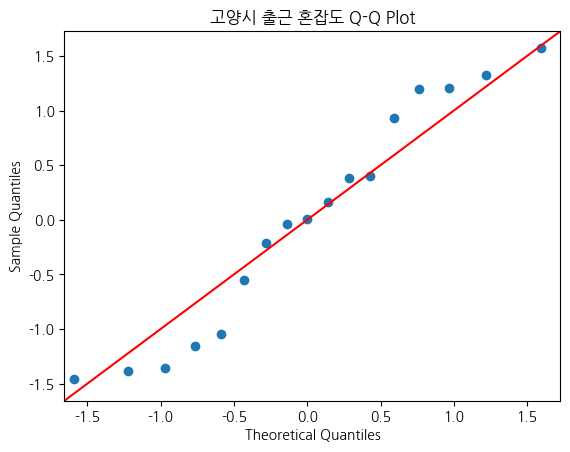

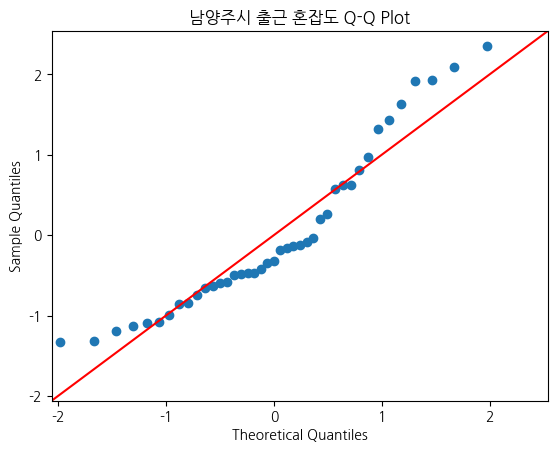

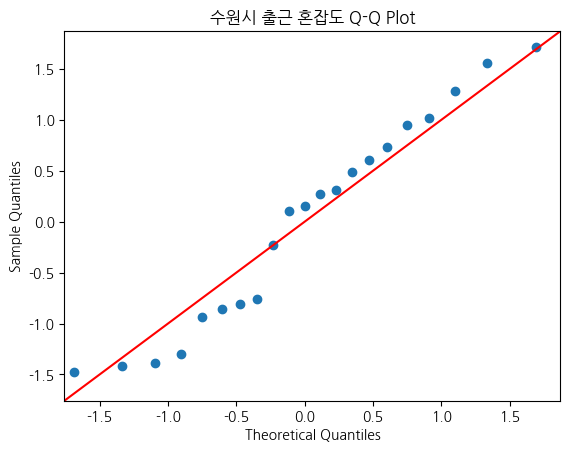

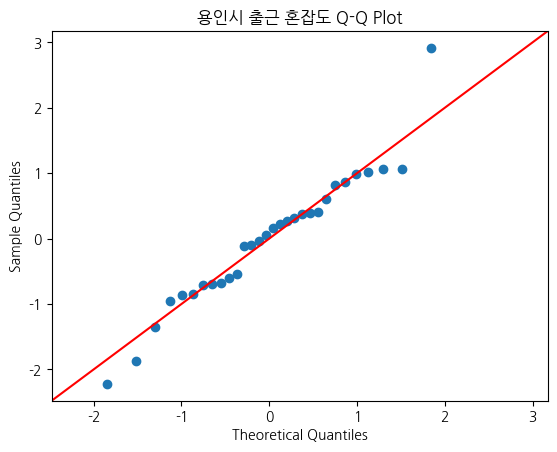

In [ ]:
# Q-Q plot 그리기
sm.qqplot(np.array(results_goyang_출근['혼잡도']), line='45', fit=True)
plt.title('고양시 출근 혼잡도 Q-Q Plot')

sm.qqplot(np.array(results_namyangju_출근['혼잡도']), line='45', fit=True)
plt.title('남양주시 출근 혼잡도 Q-Q Plot')

sm.qqplot(np.array(results_suwon_출근['혼잡도']), line='45', fit=True)
plt.title('수원시 출근 혼잡도 Q-Q Plot')

sm.qqplot(np.array(results_yongin_출근['혼잡도']), line='45', fit=True)
plt.title('용인시 출근 혼잡도 Q-Q Plot')
plt.show()

**고양시 vs 수원시**

In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic_traffic1, p_value_traffic1 = bartlett(results_goyang_출근['혼잡도'], results_suwon_출근['혼잡도'])

print("Bartlett 검정 결과:")
print("Statistic:", statistic_traffic1)
print("P-value:", p_value_traffic1)
if p_value_traffic1 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.29975662836793904
P-value: 0.5840350331458553
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 고양시와 수원시의 출근 혼잡도의 평균 차이 비교

statistic_traffic2, p_value_traffic2 = ttest_ind(results_goyang_출근['혼잡도'], results_suwon_출근['혼잡도'])

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic_traffic2)
print("P-value:", p_value_traffic2)
if p_value_traffic2 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -0.7813062629068167
P-value: 0.43973052950207103
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 고양시와 수원시의 출근 혼잡도의 중앙값 차이 비교

statistic_traffic15, p_value_traffic15 = mannwhitneyu(results_goyang_출근['혼잡도'], results_suwon_출근['혼잡도'])

print("Mann-Whitney U Statistic:", statistic_traffic15)
print("P-value:", p_value_traffic15)

if p_value_traffic15 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 150.0
P-value: 0.41106566656025056
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**고양시 vs 용인시**

In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic_traffic3, p_value_traffic3 = bartlett(results_goyang_출근['혼잡도'], results_yongin_출근['혼잡도'])

print("Bartlett 검정 결과:")
print("Statistic:", statistic_traffic3)
print("P-value:", p_value_traffic3)
if p_value_traffic3 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.8076044045677762
P-value: 0.36882945836075764
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 고양시와 용인시의 출근 혼잡도의 평균 차이 비교

statistic_traffic4, p_value_traffic4 = ttest_ind(results_goyang_출근['혼잡도'], results_yongin_출근['혼잡도'])

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic_traffic4)
print("P-value:", p_value_traffic4)
if p_value_traffic4 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -0.26908604208349346
P-value: 0.7890934229384173
두 그룹의 평균이 같습니다.


In [ ]:
### Wilcoxon rank-sum test로 고양시와 용인시의 출근 혼잡도의 중앙값 차이 비교

statistic_traffic16, p_value_traffic16 = mannwhitneyu(results_goyang_출근['혼잡도'], results_yongin_출근['혼잡도'])

print("Mann-Whitney U Statistic:", statistic_traffic16)
print("P-value:", p_value_traffic16)

if p_value_traffic16 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 250.0
P-value: 0.9206367462177909
유의미한 차이가 없습니다. 귀무가설을 채택합니다.


**남양주시 vs 수원시**

In [ ]:
### Wilcoxon rank-sum test로 남양주시와 수원시의 출근 혼잡도의 중앙값 차이 비교

from scipy.stats import mannwhitneyu

statistic_traffic5, p_value_traffic5 = mannwhitneyu(results_namyangju_출근['혼잡도'], results_suwon_출근['혼잡도'])

print("Mann-Whitney U Statistic:", statistic_traffic5)
print("P-value:", p_value_traffic5)

if p_value_traffic5 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 197.0
P-value: 0.0005291084848416636
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


In [ ]:
### Levene's test로 등분산성 확인

from scipy.stats import levene

statistic_traffic15, p_value_traffic15 = levene(results_namyangju_출근['혼잡도'], results_suwon_출근['혼잡도'])

print("Levene's Test Statistic:", statistic_traffic15)
print("P-value:", p_value_traffic15)

if p_value_traffic15 < 0.05:
    print("등분산성 가정을 기각합니다. 다른 등분산성 고려 필요.")
else:
    print("등분산성 가정을 기각하지 않습니다. 등분산성이 만족됩니다.")

Levene's Test Statistic: 0.04160468159673197
P-value: 0.8390654457158789
등분산성 가정을 기각하지 않습니다. 등분산성이 만족됩니다.


In [ ]:
### 독립표본 t-검정으로 남양주시와 수원시의 출근 혼잡도의 평균 차이 비교

statistic_traffic16, p_value_traffic16 = ttest_ind(results_namyangju_출근['혼잡도'], results_suwon_출근['혼잡도'])

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic_traffic16)
print("P-value:", p_value_traffic16)
if p_value_traffic16 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -3.6831151940199014
P-value: 0.0004961693107975552
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 남양주시와 수원시의 출근 혼잡도의 중앙값 차이 비교

statistic_traffic17, p_value_traffic17 = mannwhitneyu(results_namyangju_출근['혼잡도'], results_suwon_출근['혼잡도'])

print("Mann-Whitney U Statistic:", statistic_traffic17)
print("P-value:", p_value_traffic17)

if p_value_traffic17 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 197.0
P-value: 0.0005291084848416636
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


**남양주시 vs 용인시**

In [ ]:
### Wilcoxon rank-sum test로 남양주시와 용인시의 출근 혼잡도의 중앙값 차이 비교

statistic_traffic6, p_value_traffic6 = mannwhitneyu(results_namyangju_출근['혼잡도'], results_yongin_출근['혼잡도'])

print("Mann-Whitney U Statistic:", statistic_traffic6)
print("P-value:", p_value_traffic6)

alpha = 0.05
if p_value_traffic6 < alpha:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 321.0
P-value: 0.0006343441362352232
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


In [ ]:
### Levene's test로 등분산성 확인

statistic_traffic17, p_value_traffic17 = levene(results_namyangju_출근['혼잡도'], results_yongin_출근['혼잡도'])

print("Levene's Test Statistic:", statistic_traffic17)
print("P-value:", p_value_traffic17)

if p_value_traffic17 < 0.05:
    print("등분산성 가정을 기각합니다. 다른 등분산성 고려 필요.")
else:
    print("등분산성 가정을 기각하지 않습니다. 등분산성이 만족됩니다.")

Levene's Test Statistic: 0.32187337388574017
P-value: 0.5723252611837952
등분산성 가정을 기각하지 않습니다. 등분산성이 만족됩니다.


In [ ]:
### 독립표본 t-검정으로 남양주시와 용인시의 출근 혼잡도의 평균 차이 비교

statistic_traffic18, p_value_traffic18 = ttest_ind(results_namyangju_출근['혼잡도'], results_yongin_출근['혼잡도'])

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic_traffic18)
print("P-value:", p_value_traffic18)
if p_value_traffic18 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -3.4511959288893017
P-value: 0.0009568254395386105
두 그룹의 평균이 다릅니다.


In [ ]:
### Wilcoxon rank-sum test로 남양주시와 용인시의 출근 혼잡도의 중앙값 차이 비교

statistic_traffic18, p_value_traffic18 = mannwhitneyu(results_namyangju_출근['혼잡도'], results_yongin_출근['혼잡도'])

print("Mann-Whitney U Statistic:", statistic_traffic18)
print("P-value:", p_value_traffic18)

if p_value_traffic18 < 0.05:
    print("유의미한 차이가 있습니다. 귀무가설을 기각합니다.")
else:
    print("유의미한 차이가 없습니다. 귀무가설을 채택합니다.")

Mann-Whitney U Statistic: 321.0
P-value: 0.0006343441362352232
유의미한 차이가 있습니다. 귀무가설을 기각합니다.


### 퇴근(버스)

In [ ]:
### Shapiro-Wilk 검정으로 퇴근 혼잡도 정규정 확인

statistic_goyang2, p_value_goyang2 = shapiro(results_goyang_퇴근['혼잡도'])
statistic_namyangju2, p_value_namyangju2 = shapiro(results_namyangju_퇴근['혼잡도'])
statistic_suwon2, p_value_suwon2 = shapiro(results_suwon_퇴근['혼잡도'])
statistic_yongin2, p_value_yongin2 = shapiro(results_yongin_퇴근['혼잡도'])

print("Shapiro-Wilk 검정 결과 for 고양시 퇴근 혼잡도:")
print("Statistic:", statistic_goyang2)
print("P-value:", p_value_goyang2)
if p_value_goyang2 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 남양주시 퇴근 혼잡도:")
print("Statistic:", statistic_namyangju2)
print("P-value:", p_value_namyangju2)
if p_value_namyangju2 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 수원시 퇴근 혼잡도:")
print("Statistic:", statistic_suwon2)
print("P-value:", p_value_suwon2)
if p_value_suwon2 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

print("\nShapiro-Wilk 검정 결과 for 용인시 퇴근 혼잡도:")
print("Statistic:", statistic_yongin2)
print("P-value:", p_value_yongin2)
if p_value_yongin2 > 0.05:
    print("데이터는 정규 분포를 따릅니다.")
else:
    print("데이터는 정규 분포를 따르지 않습니다.")

Shapiro-Wilk 검정 결과 for 고양시 퇴근 혼잡도:
Statistic: 0.96538907289505
P-value: 0.7338008284568787
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 남양주시 퇴근 혼잡도:
Statistic: 0.94842928647995
P-value: 0.06164269894361496
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 수원시 퇴근 혼잡도:
Statistic: 0.9286123514175415
P-value: 0.12910933792591095
데이터는 정규 분포를 따릅니다.

Shapiro-Wilk 검정 결과 for 용인시 퇴근 혼잡도:
Statistic: 0.9626845717430115
P-value: 0.38206759095191956
데이터는 정규 분포를 따릅니다.


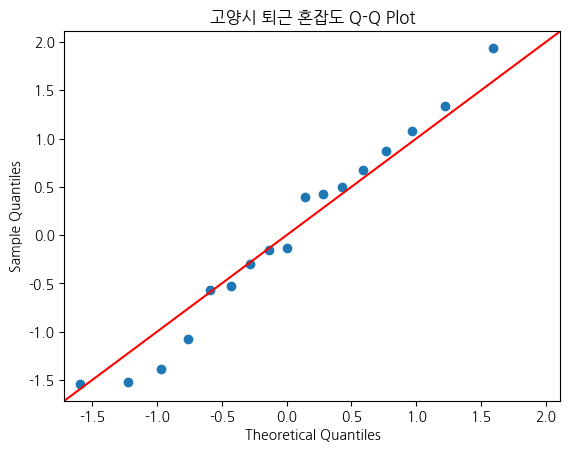

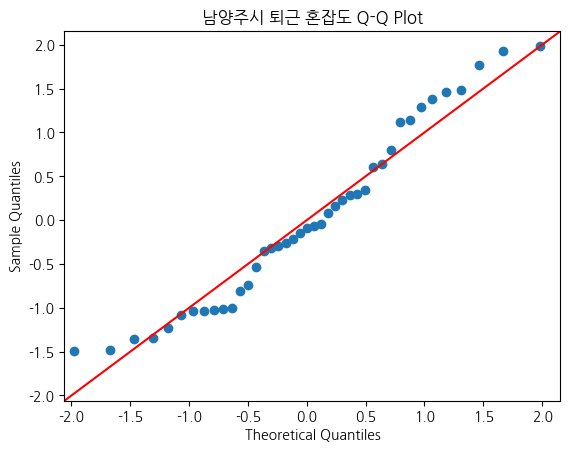

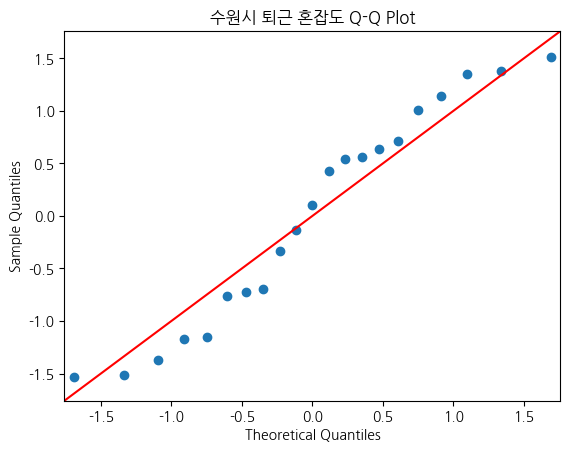

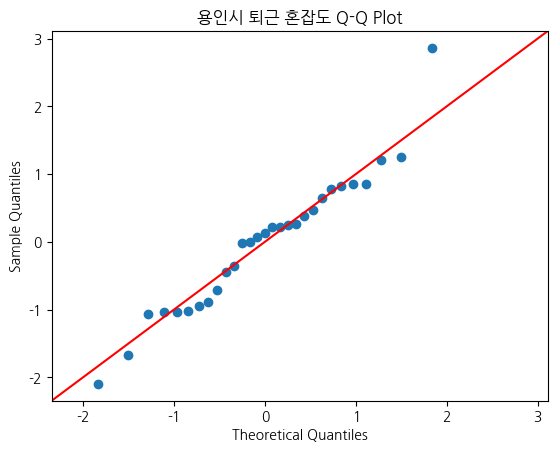

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Q-Q plot 그리기
sm.qqplot(np.array(results_goyang_퇴근['혼잡도']), line='45', fit=True)
plt.title('고양시 퇴근 혼잡도 Q-Q Plot')

sm.qqplot(np.array(results_namyangju_퇴근['혼잡도']), line='45', fit=True)
plt.title('남양주시 퇴근 혼잡도 Q-Q Plot')

sm.qqplot(np.array(results_suwon_퇴근['혼잡도']), line='45', fit=True)
plt.title('수원시 퇴근 혼잡도 Q-Q Plot')

sm.qqplot(np.array(results_yongin_퇴근['혼잡도']), line='45', fit=True)
plt.title('용인시 퇴근 혼잡도 Q-Q Plot')
plt.show()

**고양시 vs 수원시**

In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic_traffic7, p_value_traffic7 = bartlett(results_goyang_퇴근['혼잡도'], results_suwon_퇴근['혼잡도'])

print("Bartlett 검정 결과:")
print("Statistic:", statistic_traffic7)
print("P-value:", p_value_traffic7)
if p_value_traffic7 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 1.0061425327408078
P-value: 0.31582874565878577
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 고양시와 수원시의 퇴근 혼잡도의 평균 차이 비교

statistic_traffic8, p_value_traffic8 = ttest_ind(results_goyang_퇴근['혼잡도'], results_suwon_퇴근['혼잡도'])

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic_traffic8)
print("P-value:", p_value_traffic8)
if p_value_traffic8 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -0.6138202659168687
P-value: 0.5431936534391402
두 그룹의 평균이 같습니다.


**고양시 vs 용인시**

In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic_traffic9, p_value_traffic9 = bartlett(results_goyang_퇴근['혼잡도'], results_yongin_퇴근['혼잡도'])

print("Bartlett 검정 결과:")
print("Statistic:", statistic_traffic9)
print("P-value:", p_value_traffic9)
if p_value_traffic9 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 3.9163510766016065
P-value: 0.04781856428971926
데이터는 등분산성을 만족하지 않습니다.


In [ ]:
### Welch's t-test로 고양시와 용인시의 퇴근 혼잡도의 평균 차이 비교

statistic_traffic10, p_value_traffic10 = ttest_ind(results_goyang_퇴근['혼잡도'], results_yongin_퇴근['혼잡도'], equal_var=False)

print("Welch's t-test 결과:")
print("T-statistic:", statistic_traffic10)
print("P-value:", p_value_traffic10)
if p_value_traffic10 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

Welch's t-test 결과:
T-statistic: -0.0971099262178982
P-value: 0.9234447131058323
두 그룹의 평균이 같습니다.


**남양주시 vs 수원시**

In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic_traffic11, p_value_traffic11 = bartlett(results_namyangju_퇴근['혼잡도'], results_suwon_퇴근['혼잡도'])

print("Bartlett 검정 결과:")
print("Statistic:", statistic_traffic11)
print("P-value:", p_value_traffic11)
if p_value_traffic11 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.10786581237821599
P-value: 0.7425870839341067
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 남양주시와 수원시의 퇴근 혼잡도의 평균 차이 비교

statistic_traffic12, p_value_traffic12 = ttest_ind(results_namyangju_퇴근['혼잡도'], results_suwon_퇴근['혼잡도'])

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic_traffic12)
print("P-value:", p_value_traffic12)
if p_value_traffic12 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -3.52655795950305
P-value: 0.0008136969978671206
두 그룹의 평균이 다릅니다.


**남양주시 vs 용인시**

In [ ]:
### Bartlett 검정으로 등분산성 확인

statistic_traffic13, p_value_traffic13 = bartlett(results_namyangju_퇴근['혼잡도'], results_yongin_퇴근['혼잡도'])

print("Bartlett 검정 결과:")
print("Statistic:", statistic_traffic13)
print("P-value:", p_value_traffic13)
if p_value_traffic13 > 0.05:
    print("데이터는 등분산성을 만족합니다.")
else:
    print("데이터는 등분산성을 만족하지 않습니다.")

Bartlett 검정 결과:
Statistic: 0.5324080395460784
P-value: 0.46559622544615153
데이터는 등분산성을 만족합니다.


In [ ]:
### 독립표본 t-검정으로 남양주시와 용인시의 퇴근 혼잡도의 평균 차이 비교

statistic_traffic14, p_value_traffic14 = ttest_ind(results_namyangju_퇴근['혼잡도'], results_yongin_퇴근['혼잡도'])

print("독립표본 t-검정 결과:")
print("T-statistic:", statistic_traffic14)
print("P-value:", p_value_traffic14)
if p_value_traffic14 < 0.05:
    print("두 그룹의 평균이 다릅니다.")
else:
    print("두 그룹의 평균이 같습니다.")

독립표본 t-검정 결과:
T-statistic: -3.300106817164383
P-value: 0.0015411939211603509
두 그룹의 평균이 다릅니다.
